In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from csv import reader
import csv
from scipy.stats import chisquare
from scipy.stats import t
import seaborn as sns
import pandas as pd

In [2]:
data = {"HD002857_V3.2": "A2IV","HD032537_V3.2": "F0V", "HD034411_V3.2": "G0V", "HD035497_V3.2": "B7III", "HD041593_V3.2": "K0V", "HD061064_V3.2": "F6III", "HD063077_V3.2": "G0V", "HD065583_V3.2": "G8V", "HD067767_V3.2": "G8IV", "HD069897_V3.2": "F6V", "HD075732_V3.2": "G8V", "HD076151_V3.2": "G3V", "HD086728_V3.2": "G1V", "HD087737_V3.2": "A0Ib", "HD091316_V3.2": "B1Ib", "HD094028_V3.2": "F4V", "HD095418_V3.2": "A1V","HD097633_V3.2": "A2V", "HD100006_V3.2": "K0III", "HD132142_V3.2": "K1V", "HD134083_V3.2": "F5V","HD164353_V3.2": "B5Ib", "HD086986_V3.2": "A1V", "HD060778_V3.2": "A1V","HD037394_V3.2": "K1V","HD094247_V3.2": "K3III", "HD050420_V3.2": "A9III", "HD147394_V3.2": "B5IV", "HD034816": "B0.5IV", "HD039949": "G2Ib", "HD036673": "F0Ib"}
class_data = []
type_data = []

for i in data.values():
    class_data.append(i[0])
class_data = np.array(class_data)
plot_data = {'Ib':0,'III':0,'IV':0, 'V':0}

for i in list(data.values()):
    try:
        plot_data[i[2:]] += 1
        type_data.append(i[2:])
    except:
        plot_data[i[4:]] += 1
        type_data.append(i[4:])
        
        
type_data = np.array(type_data)
types = np.unique(type_data)

In [3]:
tgm_data = np.array([])
with open(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/tgm_data.txt") as f:
    for line in f:
        temp = line.split()
        if(len(temp) > 1):
            if(tgm_data.size == 0):
                tgm_data = np.array([float(temp[5]),float(temp[7]),float(temp[9]),float(temp[11]),float(temp[13]),float(temp[15]),float(temp[17]),float(temp[19]),float(temp[21]),float(temp[23]),float(temp[25])])
            else:
                tgm_data = np.row_stack((tgm_data,[float(temp[5]),float(temp[7]),float(temp[9]),float(temp[11]),float(temp[13]),float(temp[15]),float(temp[17]),float(temp[19]),float(temp[21]),float(temp[23]),float(temp[25])]))
        else:
            continue

In [4]:
tgm_data_B = np.array([])
with open(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/tgm_data_B.txt") as f:
    for line in f:
        temp = line.split()
        if(len(temp) > 1):
            if(tgm_data_B.size == 0):
                tgm_data_B = np.array([float(temp[5]),float(temp[7]),float(temp[9]),float(temp[11]),float(temp[13]),float(temp[15]),float(temp[17]),float(temp[19]),float(temp[21]),float(temp[23]),float(temp[25])])
            else:
                tgm_data_B = np.row_stack((tgm_data_B,[float(temp[5]),float(temp[7]),float(temp[9]),float(temp[11]),float(temp[13]),float(temp[15]),float(temp[17]),float(temp[19]),float(temp[21]),float(temp[23]),float(temp[25])]))
        else:
            continue

In [5]:
tgm_data_V = np.array([])
with open(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/tgm_data_V.txt") as f:
    for line in f:
        temp = line.split()
        if(len(temp) > 1):
            if(tgm_data_V.size == 0):
                tgm_data_V = np.array([float(temp[5]),float(temp[7]),float(temp[9]),float(temp[11]),float(temp[13]),float(temp[15]),float(temp[17]),float(temp[19]),float(temp[21]),float(temp[23]),float(temp[25])])
            else:
                try:
                    tgm_data_V = np.row_stack((tgm_data_V,[float(temp[5]),float(temp[7]),float(temp[9]),float(temp[11]),float(temp[13]),float(temp[15]),float(temp[17]),float(temp[19]),float(temp[21]),float(temp[23]),float(temp[25])]))
                except:
                    tgm_data_V = np.row_stack((tgm_data_V,[0,0,0,0,0,0,0,0,float(temp[13]),float(temp[15]),float(temp[17])]))
        else:
            continue

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:89: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


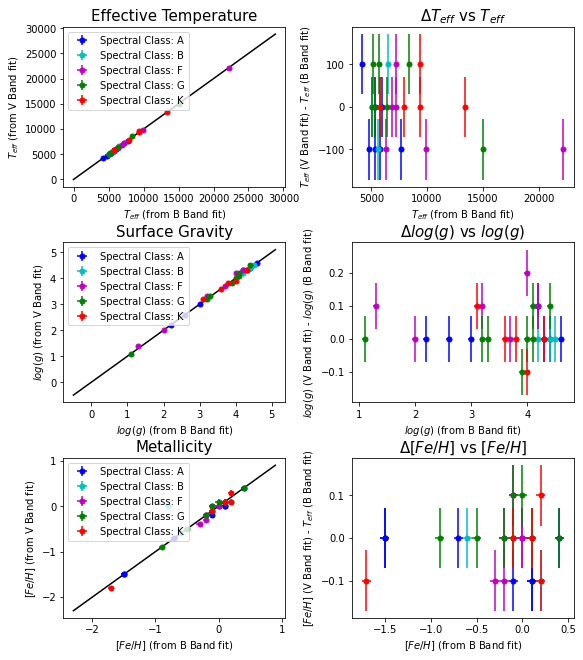

In [8]:
# B vs V
t_f = 15
n_row = 3
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(tgm_data_B.T[0])-50.0, min(tgm_data_V.T[0])-50.0)
point1 = [p1, p1]
p2 = max(max(tgm_data_B.T[0])+50.0, max(tgm_data_V.T[0])+50.0)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[0] == 0))),)
    plt.errorbar(tgm_data_B.T[0][idx], tgm_data_V.T[0][idx], yerr=tgm_data_V.T[1][idx], xerr=tgm_data_B.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$T_{eff}$ (from B Band fit)")
plt.ylabel(r"$T_{eff}$ (from V Band fit)")
plt.legend(loc ='upper left')   
plt.title("Effective Temperature",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[0] == 0))),)
    plt.errorbar(tgm_data_B.T[0][idx], tgm_data_V.T[0][idx]-tgm_data_B.T[0][idx], yerr=np.sqrt(tgm_data_V.T[1][idx]**2 + tgm_data_B.T[1][idx]**2),xerr=tgm_data_B.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$T_{eff}$ (from B Band fit)", fontsize = 10)
plt.ylabel(r"$T_{eff}$ (V Band fit) - $T_{eff}$ (B Band fit)", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta T_{eff}$ vs $T_{eff}$",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,3)
p1 = min(min(tgm_data_B.T[2])-0.50, min(tgm_data_V.T[2])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data_B.T[2])+0.50, max(tgm_data_V.T[2])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[2] == 0))),)
    plt.errorbar(tgm_data_B.T[2][idx], tgm_data_V.T[2][idx], yerr=tgm_data_V.T[3][idx], xerr=tgm_data_B.T[3][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$log(g)$ (from B Band fit)")
plt.ylabel(r"$log(g)$ (from V Band fit)")
plt.legend(loc ='upper left')   
plt.title("Surface Gravity",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,4)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[2] == 0))),)
    plt.errorbar(tgm_data_B.T[2][idx], tgm_data_V.T[2][idx]-tgm_data_B.T[2][idx], yerr=np.sqrt(tgm_data_V.T[3][idx]**2 + tgm_data_B.T[3][idx]**2),xerr=tgm_data_B.T[3][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$log(g)$ (from B Band fit)", fontsize = 10)
plt.ylabel(r"$log(g)$ (V Band fit) - $log(g)$ (B Band fit)", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta log(g)$ vs $log(g)$",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,5)
p1 = min(min(tgm_data_B.T[4])-0.50, min(tgm_data_V.T[4])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data_B.T[4])+0.50, max(tgm_data_V.T[4])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[4] == 0))),)
    plt.errorbar(tgm_data_B.T[4][idx], tgm_data_V.T[4][idx], yerr=tgm_data_V.T[5][idx], xerr=tgm_data_B.T[5][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$[Fe/H]$ (from B Band fit)")
plt.ylabel(r"$[Fe/H]$ (from V Band fit)")
plt.legend(loc ='upper left')   
plt.title("Metallicity",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,6)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[0] == 0))),)
    plt.errorbar(tgm_data_B.T[4][idx], tgm_data_V.T[4][idx]-tgm_data_B.T[4][idx], yerr=np.sqrt(tgm_data_V.T[5][idx]**2 + tgm_data_B.T[5][idx]**2),xerr=tgm_data_B.T[5][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$[Fe/H]$ (from B Band fit)", fontsize = 10)
plt.ylabel(r"$[Fe/H]$ (V Band fit) - $T_{eff}$ (B Band fit)", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta [Fe/H]$ vs $[Fe/H]$",fontsize=t_f)

fig.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:90: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


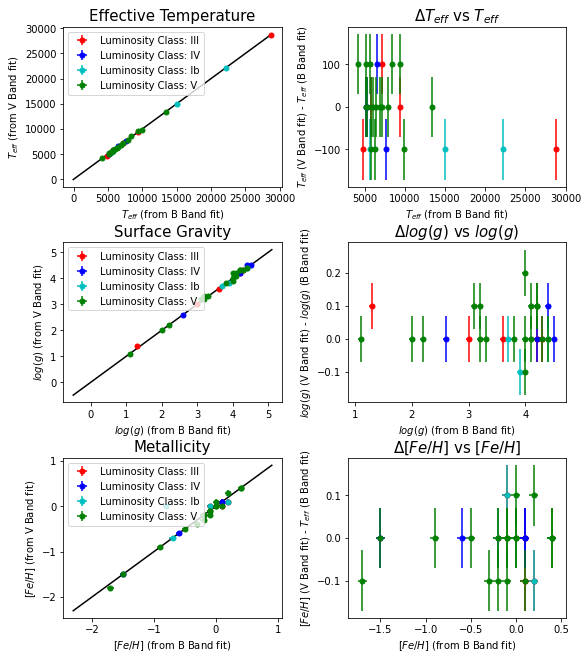

In [9]:
# B vs V
t_f = 15
n_row = 3
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(tgm_data_B.T[0])-50.0, min(tgm_data_V.T[0])-50.0)
point1 = [p1, p1]
p2 = max(max(tgm_data_B.T[0])+50.0, max(tgm_data_V.T[0])+50.0)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['or','ob','oc','og','or']

ctr = 0
classes = np.unique(class_data)
for i in types:
    idx = np.where(type_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[0] == 0))),)
    plt.errorbar(tgm_data_B.T[0][idx], tgm_data_V.T[0][idx], yerr=tgm_data_V.T[1][idx], xerr=tgm_data_B.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$T_{eff}$ (from B Band fit)")
plt.ylabel(r"$T_{eff}$ (from V Band fit)")
plt.legend(loc ='upper left')   
plt.title("Effective Temperature",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in types:
    idx = np.where(type_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[0] == 0))),)
    plt.errorbar(tgm_data_B.T[0][idx], tgm_data_V.T[0][idx]-tgm_data_B.T[0][idx], yerr=np.sqrt(tgm_data_V.T[1][idx]**2 + tgm_data_B.T[1][idx]**2),xerr=tgm_data_B.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$T_{eff}$ (from B Band fit)", fontsize = 10)
plt.ylabel(r"$T_{eff}$ (V Band fit) - $T_{eff}$ (B Band fit)", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta T_{eff}$ vs $T_{eff}$",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,3)
p1 = min(min(tgm_data_B.T[2])-0.50, min(tgm_data_V.T[2])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data_B.T[2])+0.50, max(tgm_data_V.T[2])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['or','ob','oc','og','or']
ctr = 0
classes = np.unique(class_data)
for i in types:
    idx = np.where(type_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[2] == 0))),)
    plt.errorbar(tgm_data_B.T[2][idx], tgm_data_V.T[2][idx], yerr=tgm_data_V.T[3][idx], xerr=tgm_data_B.T[3][idx], fmt=frmt[ctr], markersize = '5', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$log(g)$ (from B Band fit)")
plt.ylabel(r"$log(g)$ (from V Band fit)")
plt.legend(loc ='upper left')   
plt.title("Surface Gravity",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,4)
ctr = 0

for i in types:
    idx = np.where(type_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[2] == 0))),)
    plt.errorbar(tgm_data_B.T[2][idx], tgm_data_V.T[2][idx]-tgm_data_B.T[2][idx], yerr=np.sqrt(tgm_data_V.T[3][idx]**2 + tgm_data_B.T[3][idx]**2),xerr=tgm_data_B.T[3][idx], fmt=frmt[ctr], markersize = '5', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$log(g)$ (from B Band fit)", fontsize = 10)
plt.ylabel(r"$log(g)$ (V Band fit) - $log(g)$ (B Band fit)", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta log(g)$ vs $log(g)$",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,5)
p1 = min(min(tgm_data_B.T[4])-0.50, min(tgm_data_V.T[4])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data_B.T[4])+0.50, max(tgm_data_V.T[4])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['or','ob','oc','og','or']
ctr = 0

for i in types:
    idx = np.where(type_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[4] == 0))),)
    plt.errorbar(tgm_data_B.T[4][idx], tgm_data_V.T[4][idx], yerr=tgm_data_V.T[5][idx], xerr=tgm_data_B.T[5][idx], fmt=frmt[ctr], markersize = '5', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$[Fe/H]$ (from B Band fit)")
plt.ylabel(r"$[Fe/H]$ (from V Band fit)")
plt.legend(loc ='upper left')   
plt.title("Metallicity",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,6)
ctr = 0

for i in types:
    idx = np.where(type_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[0] == 0))),)
    plt.errorbar(tgm_data_B.T[4][idx], tgm_data_V.T[4][idx]-tgm_data_B.T[4][idx], yerr=np.sqrt(tgm_data_V.T[5][idx]**2 + tgm_data_B.T[5][idx]**2),xerr=tgm_data_B.T[5][idx], fmt=frmt[ctr], markersize = '5', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$[Fe/H]$ (from B Band fit)", fontsize = 10)
plt.ylabel(r"$[Fe/H]$ (V Band fit) - $T_{eff}$ (B Band fit)", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta [Fe/H]$ vs $[Fe/H]$",fontsize=t_f)

fig.tight_layout(pad=0.1)

['A' 'F' 'G' 'B' 'K' 'F' 'G' 'G' 'G' 'F' 'G' 'G' 'G' 'A' 'B' 'F' 'A' 'A'
 'K' 'K' 'F' 'B' 'A' 'A' 'K' 'K' 'A' 'B' 'B' 'G' 'F']


/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


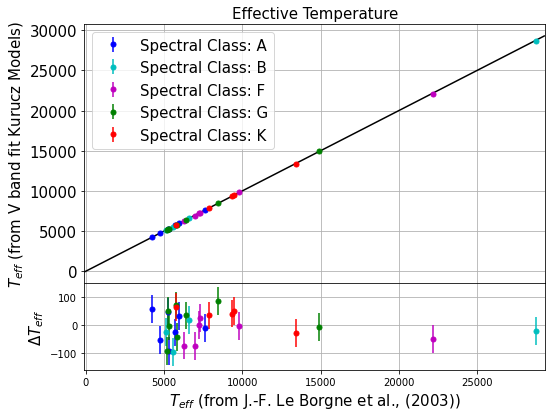

In [49]:
t_f = 15
n_row = 1
n_col = 2
fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(tgm_data_V.T[8])-50.0, min(tgm_data_V.T[0])-50.0)
point1 = [p1, p1]
p2 = max(max(tgm_data_V.T[8])+50.0, max(tgm_data_V.T[0])+50.0)
point2 = [p2,p2]
p1,p2 = min(point1[0],point1[1]),max(point2[0],point2[1])
x_values = [p1, p2+500] #gather x-values.
y_values = [p1, p2+500] #gather y-values.

plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
print(class_data)
for i in classes:
    idx = np.where(class_data == i)
    where_no_V = np.where(tgm_data_V.T[0] == 0)
    idx = ([j for j in idx[0] if j != where_no_V],)
    plt.errorbar(tgm_data_V.T[8][idx], tgm_data_V.T[0][idx], yerr=tgm_data_V.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.xlim(x_values[0]-50,x_values[-1]+50)
plt.grid()
plt.xlabel(r"$T_{eff}$ (from J.-F. Le Borgne et al., (2003))",fontsize=t_f)
plt.ylabel(r"$T_{eff}$ (from V band fit Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Effective Temperature",fontsize=t_f)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    where_no_V = np.where(tgm_data_V.T[0] == 0)
    idx = ([j for j in idx[0] if j != where_no_V],)
    plt.errorbar(tgm_data_V.T[8][idx], tgm_data_V.T[0][idx]-tgm_data_V.T[8][idx], yerr=tgm_data_V.T[1][idx],fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$T_{eff}$ (from J.-F. Le Borgne et al., (2003))", fontsize = t_f)
plt.ylabel(r"$\Delta T_{eff}$", fontsize = t_f)
plt.grid()
plt.xlim(x_values[0]-50,x_values[-1]+50)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

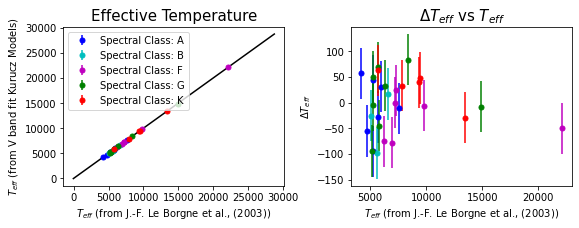

In [125]:
t_f = 15
n_row = 1
n_col = 2

fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(tgm_data_V.T[8])-50.0, min(tgm_data_V.T[0])-50.0)
point1 = [p1, p1]
p2 = max(max(tgm_data_V.T[8])+50.0, max(tgm_data_V.T[0])+50.0)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[0] == 0))),)
    plt.errorbar(tgm_data_V.T[8][idx], tgm_data_V.T[0][idx], yerr=tgm_data_V.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$T_{eff}$ (from J.-F. Le Borgne et al., (2003))")
plt.ylabel(r"$T_{eff}$ (from V band fit Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Effective Temperature",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[0] == 0))),)
    plt.errorbar(tgm_data_V.T[8][idx], tgm_data_V.T[0][idx]-tgm_data_V.T[8][idx], yerr=tgm_data_V.T[1][idx],fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$T_{eff}$ (from J.-F. Le Borgne et al., (2003))", fontsize = 10)
plt.ylabel(r"$\Delta T_{eff}$", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta T_{eff}$ vs $T_{eff}$",fontsize=t_f)
fig.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


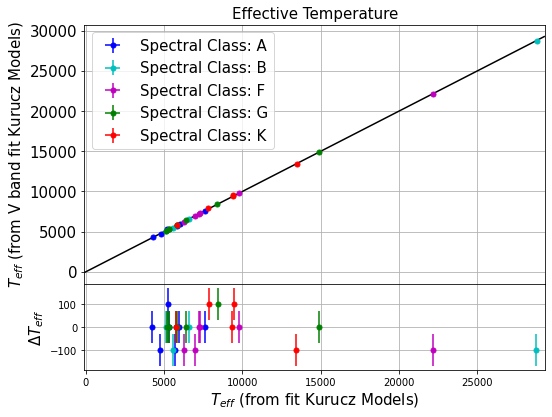

In [52]:
t_f = 15
n_row = 1
n_col = 2
fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(tgm_data_V.T[8])-50.0, min(tgm_data_V.T[0])-50.0)
point1 = [p1, p1]
p2 = max(max(tgm_data_V.T[8])+50.0, max(tgm_data_V.T[0])+50.0)
point2 = [p2,p2]
p1,p2 = min(point1[0],point1[1]),max(point2[0],point2[1])
x_values = [p1, p2+500] #gather x-values.
y_values = [p1, p2+500] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    where_no_V = np.where(tgm_data_V.T[0] == 0)
    idx = ([j for j in idx[0] if j != where_no_V],)
    plt.errorbar(tgm_data.T[0][idx], tgm_data_V.T[0][idx], yerr=tgm_data_V.T[1][idx], xerr=tgm_data.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1

plt.xlabel(r"$T_{eff}$ (from fit Kurucz Models)",fontsize=t_f)
plt.ylabel(r"$T_{eff}$ (from V band fit Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Effective Temperature",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-50,x_values[-1]+50)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    where_no_V = np.where(tgm_data_V.T[0] == 0)
    idx = ([j for j in idx[0] if j != where_no_V],)
    plt.errorbar(tgm_data_V.T[8][idx], tgm_data_V.T[0][idx]-tgm_data.T[0][idx], yerr=np.sqrt(tgm_data_V.T[1][idx]**2 + tgm_data.T[1][idx]**2), xerr=tgm_data.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$T_{eff}$ (from fit Kurucz Models)", fontsize = t_f)
plt.ylabel(r"$\Delta T_{eff}$", fontsize = t_f)
plt.grid()
plt.xlim(x_values[0]-50,x_values[-1]+50)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

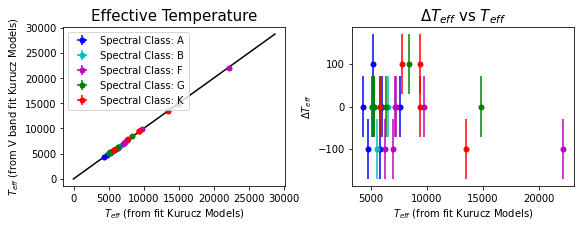

In [73]:
t_f = 15
n_row = 1
n_col = 2

fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(tgm_data_V.T[8])-50.0, min(tgm_data_V.T[0])-50.0)
point1 = [p1, p1]
p2 = max(max(tgm_data_V.T[8])+50.0, max(tgm_data_V.T[0])+50.0)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[0] == 0))),)
    plt.errorbar(tgm_data.T[0][idx], tgm_data_V.T[0][idx], yerr=tgm_data_V.T[1][idx], xerr=tgm_data.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$T_{eff}$ (from fit Kurucz Models)")
plt.ylabel(r"$T_{eff}$ (from V band fit Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Effective Temperature",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[0] == 0))),)
    plt.errorbar(tgm_data.T[0][idx], tgm_data_V.T[0][idx]-tgm_data.T[0][idx], yerr=np.sqrt(tgm_data_V.T[1][idx]**2 + tgm_data.T[1][idx]**2), xerr=tgm_data.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$T_{eff}$ (from fit Kurucz Models)", fontsize = 10)
plt.ylabel(r"$\Delta T_{eff}$", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta T_{eff}$ vs $T_{eff}$",fontsize=t_f)
fig.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


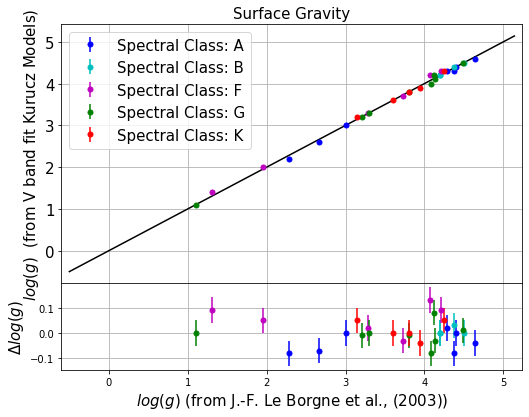

In [53]:
t_f = 15
n_row = 1
n_col = 2
fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(tgm_data_V.T[9])-0.5, min(tgm_data_V.T[2])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data_V.T[9])+0.50, max(tgm_data_V.T[2])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    where_no_V = np.where(tgm_data_V.T[0] == 0)
    idx = ([j for j in idx[0] if j != where_no_V],)
    plt.errorbar(tgm_data_V.T[9][idx], tgm_data_V.T[2][idx], yerr=tgm_data_V.T[3][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$log(g)$ (from J.-F. Le Borgne et al., (2003))",fontsize=t_f)
plt.ylabel(r"$log(g)$  (from V band fit Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Surface Gravity",fontsize=t_f)
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)
frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    where_no_V = np.where(tgm_data_V.T[0] == 0)
    idx = ([j for j in idx[0] if j != where_no_V],)
    plt.errorbar(tgm_data_V.T[9][idx], tgm_data_V.T[2][idx]-tgm_data_V.T[9][idx], yerr=tgm_data_V.T[3][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$log(g)$ (from J.-F. Le Borgne et al., (2003))", fontsize = t_f)
plt.ylabel(r"$\Delta log(g)$", fontsize = t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

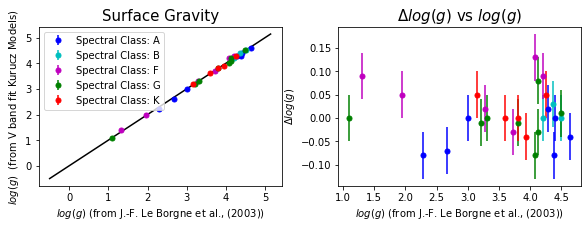

In [67]:
t_f = 15
n_row = 1
n_col = 2

fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(tgm_data_V.T[9])-0.5, min(tgm_data_V.T[2])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data_V.T[9])+0.50, max(tgm_data_V.T[2])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[0] == 0))),)
    plt.errorbar(tgm_data_V.T[9][idx], tgm_data_V.T[2][idx], yerr=tgm_data_V.T[3][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$log(g)$ (from J.-F. Le Borgne et al., (2003))")
plt.ylabel(r"$log(g)$  (from V band fit Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Surface Gravity",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[0] == 0))),)
    plt.errorbar(tgm_data_V.T[9][idx], tgm_data_V.T[2][idx]-tgm_data_V.T[9][idx], yerr=tgm_data_V.T[3][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$log(g)$ (from J.-F. Le Borgne et al., (2003))", fontsize = 10)
plt.ylabel(r"$\Delta log(g)$", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta log(g)$ vs $log(g)$",fontsize=t_f)
fig.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


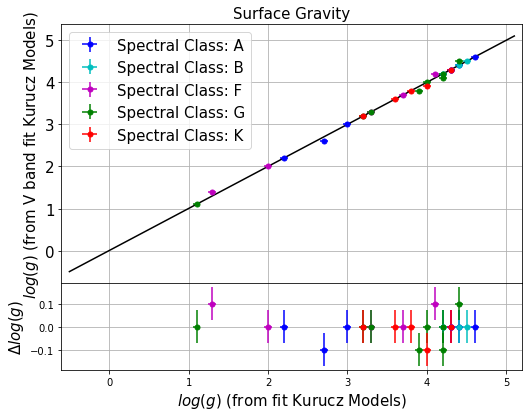

In [54]:
t_f = 15
n_row = 1
n_col = 2
fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(tgm_data.T[2])-0.5, min(tgm_data_V.T[2])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data.T[2])+0.50, max(tgm_data_V.T[2])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    where_no_V = np.where(tgm_data_V.T[0] == 0)
    idx = ([j for j in idx[0] if j != where_no_V],)
    plt.errorbar(tgm_data.T[2][idx], tgm_data_V.T[2][idx], yerr=tgm_data_V.T[3][idx], xerr=tgm_data.T[3][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$log(g)$ (from fit Kurucz Models)",fontsize=t_f)
plt.ylabel(r"$log(g)$ (from V band fit Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Surface Gravity",fontsize=t_f)
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)
frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    where_no_V = np.where(tgm_data_V.T[0] == 0)
    idx = ([j for j in idx[0] if j != where_no_V],)
    plt.errorbar(tgm_data.T[2][idx], tgm_data_V.T[2][idx]-tgm_data.T[2][idx], yerr=np.sqrt(tgm_data_V.T[3][idx]**2 + tgm_data.T[3][idx]**2), xerr=tgm_data.T[3][idx],fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$log(g)$ (from fit Kurucz Models)", fontsize =t_f)
plt.ylabel(r"$\Delta log(g)$", fontsize = t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

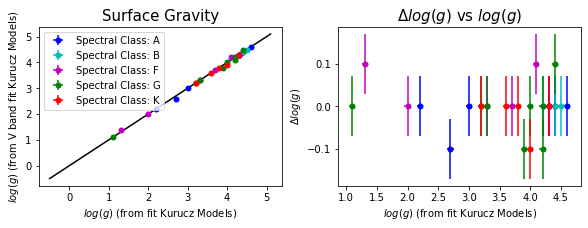

In [71]:
t_f = 15
n_row = 1
n_col = 2

fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(tgm_data.T[2])-0.5, min(tgm_data_V.T[2])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data.T[2])+0.50, max(tgm_data_V.T[2])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[0] == 0))),)
    plt.errorbar(tgm_data.T[2][idx], tgm_data_V.T[2][idx], yerr=tgm_data_V.T[3][idx], xerr=tgm_data.T[3][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$log(g)$ (from fit Kurucz Models)")
plt.ylabel(r"$log(g)$ (from V band fit Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Surface Gravity",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[0] == 0))),)
    plt.errorbar(tgm_data.T[2][idx], tgm_data_V.T[2][idx]-tgm_data.T[2][idx], yerr=np.sqrt(tgm_data_V.T[3][idx]**2 + tgm_data.T[3][idx]**2), xerr=tgm_data.T[3][idx],fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$log(g)$ (from fit Kurucz Models)", fontsize = 10)
plt.ylabel(r"$\Delta log(g)$", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta log(g)$ vs $log(g)$",fontsize=t_f)
fig.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


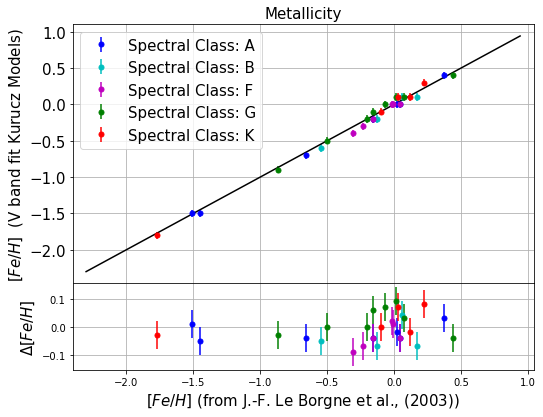

In [55]:
t_f = 15
n_row = 1
n_col = 2
fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(tgm_data_V.T[10])-0.5, min(tgm_data_V.T[4])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data_V.T[10])+0.50, max(tgm_data_V.T[4])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    where_no_V = np.where(tgm_data_V.T[0] == 0)
    idx = ([j for j in idx[0] if j != where_no_V],)
    plt.errorbar(tgm_data_V.T[10][idx], tgm_data_V.T[4][idx], yerr=tgm_data_V.T[5][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$[Fe/H]$ (from J.-F. Le Borgne et al., (2003))",fontsize=t_f)
plt.ylabel(r"$[Fe/H]$  (V band fit Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Metallicity",fontsize=t_f)
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)
frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    where_no_V = np.where(tgm_data_V.T[0] == 0)
    idx = ([j for j in idx[0] if j != where_no_V],)
    plt.errorbar(tgm_data_V.T[10][idx], tgm_data_V.T[4][idx]-tgm_data_V.T[10][idx], yerr=tgm_data_V.T[5][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$[Fe/H]$ (from J.-F. Le Borgne et al., (2003))", fontsize = t_f)
plt.ylabel(r"$\Delta [Fe/H]$", fontsize = t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

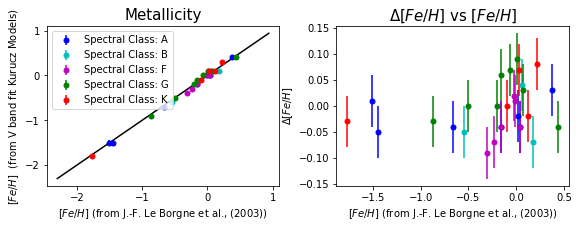

In [74]:
t_f = 15
n_row = 1
n_col = 2

fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(tgm_data_V.T[10])-0.5, min(tgm_data_V.T[4])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data_V.T[10])+0.50, max(tgm_data_V.T[4])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[0] == 0))),)
    plt.errorbar(tgm_data_V.T[10][idx], tgm_data_V.T[4][idx], yerr=tgm_data_V.T[5][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$[Fe/H]$ (from J.-F. Le Borgne et al., (2003))")
plt.ylabel(r"$[Fe/H]$  (from V band fit Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Metallicity",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[0] == 0))),)
    plt.errorbar(tgm_data_V.T[10][idx], tgm_data_V.T[4][idx]-tgm_data_V.T[10][idx], yerr=tgm_data_V.T[5][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$[Fe/H]$ (from J.-F. Le Borgne et al., (2003))", fontsize = 10)
plt.ylabel(r"$\Delta [Fe/H]$", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta [Fe/H]$ vs $[Fe/H]$",fontsize=t_f)
fig.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


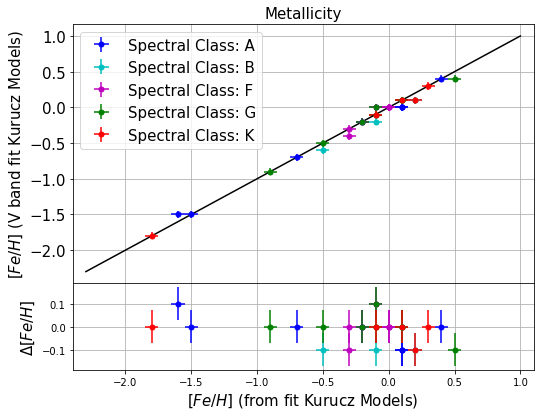

In [56]:
t_f = 15
n_row = 1
n_col = 2
fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(tgm_data.T[4])-0.5, min(tgm_data_V.T[4])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data.T[4])+0.50, max(tgm_data_V.T[4])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    where_no_V = np.where(tgm_data_V.T[0] == 0)
    idx = ([j for j in idx[0] if j != where_no_V],)
    plt.errorbar(tgm_data.T[4][idx], tgm_data_V.T[4][idx], yerr=tgm_data_V.T[5][idx], xerr=tgm_data.T[5][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$[Fe/H]$ (from fit Kurucz Models)",fontsize=t_f)
plt.ylabel(r"$[Fe/H]$ (V band fit Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Metallicity",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)
frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    where_no_V = np.where(tgm_data_V.T[0] == 0)
    idx = ([j for j in idx[0] if j != where_no_V],)
    plt.errorbar(tgm_data.T[4][idx], tgm_data_V.T[4][idx]-tgm_data.T[4][idx], yerr=np.sqrt(tgm_data_V.T[5][idx]**2 + tgm_data.T[5][idx]**2), xerr=tgm_data.T[5][idx],fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$[Fe/H]$ (from fit Kurucz Models)", fontsize = t_f)
plt.ylabel(r"$\Delta [Fe/H]$", fontsize = t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

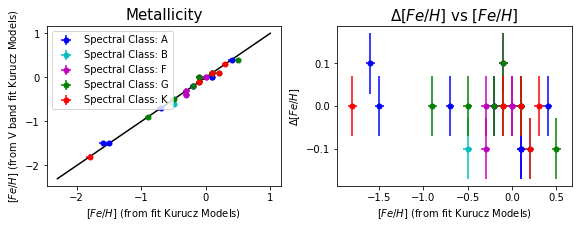

In [76]:
t_f = 15
n_row = 1
n_col = 2

fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(tgm_data.T[4])-0.5, min(tgm_data_V.T[4])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data.T[4])+0.50, max(tgm_data_V.T[4])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[0] == 0))),)
    plt.errorbar(tgm_data.T[4][idx], tgm_data_V.T[4][idx], yerr=tgm_data_V.T[5][idx], xerr=tgm_data.T[5][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$[Fe/H]$ (from fit Kurucz Models)")
plt.ylabel(r"$[Fe/H]$ (from V band fit Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Metallicity",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[0] == 0))),)
    plt.errorbar(tgm_data.T[4][idx], tgm_data_V.T[4][idx]-tgm_data.T[4][idx], yerr=np.sqrt(tgm_data_V.T[5][idx]**2 + tgm_data.T[5][idx]**2), xerr=tgm_data.T[5][idx],fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$[Fe/H]$ (from fit Kurucz Models)", fontsize = 10)
plt.ylabel(r"$\Delta [Fe/H]$", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta [Fe/H]$ vs $[Fe/H]$",fontsize=t_f)
fig.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


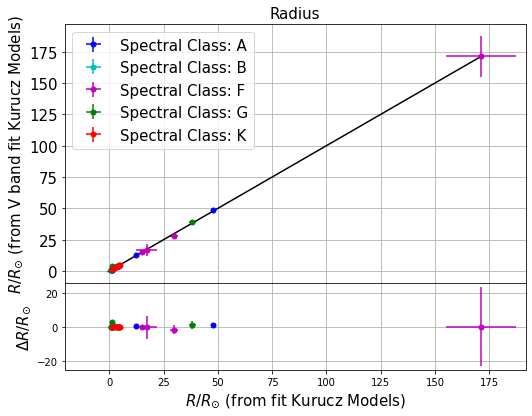

In [23]:
t_f = 15
n_row = 1
n_col = 2
fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(tgm_data.T[6])-0.5, min(tgm_data_V.T[6])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data.T[6])+0.50, max(tgm_data_V.T[6])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[0] == 0))),)
    plt.errorbar(tgm_data.T[6][idx], tgm_data_V.T[6][idx], yerr=tgm_data_V.T[7][idx], xerr=tgm_data.T[7][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$R/R_{\odot}$ (from fit Kurucz Models)",fontsize=t_f)
plt.ylabel(r"$R/R_{\odot}$ (from V band fit Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Radius",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-20,x_values[-1]+20)
frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[0] == 0))),)
    plt.errorbar(tgm_data.T[6][idx], tgm_data_V.T[6][idx]-tgm_data.T[6][idx], yerr=np.sqrt(tgm_data_V.T[7][idx]**2 + tgm_data.T[7][idx]**2), xerr=tgm_data.T[7][idx],fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$R/R_{\odot}$ (from fit Kurucz Models)", fontsize = t_f)
plt.ylabel(r"$\Delta R/R_{\odot}$", fontsize = t_f)
plt.grid()
plt.xlim(x_values[0]-20,x_values[-1]+20)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

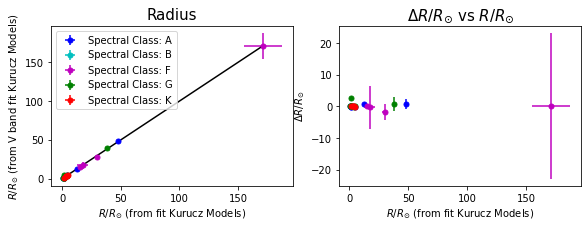

In [78]:
t_f = 15
n_row = 1
n_col = 2

fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(tgm_data.T[6])-0.5, min(tgm_data_V.T[6])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data.T[6])+0.50, max(tgm_data_V.T[6])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[0] == 0))),)
    plt.errorbar(tgm_data.T[6][idx], tgm_data_V.T[6][idx], yerr=tgm_data_V.T[7][idx], xerr=tgm_data.T[7][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$R/R_{\odot}$ (from fit Kurucz Models)")
plt.ylabel(r"$R/R_{\odot}$ (from V band fit Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Radius",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[0] == 0))),)
    plt.errorbar(tgm_data.T[6][idx], tgm_data_V.T[6][idx]-tgm_data.T[6][idx], yerr=np.sqrt(tgm_data_V.T[7][idx]**2 + tgm_data.T[7][idx]**2), xerr=tgm_data.T[7][idx],fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$R/R_{\odot}$ (from fit Kurucz Models)", fontsize = 10)
plt.ylabel(r"$\Delta R/R_{\odot}$", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta R/R_{\odot}$ vs $R/R_{\odot}$",fontsize=t_f)
fig.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


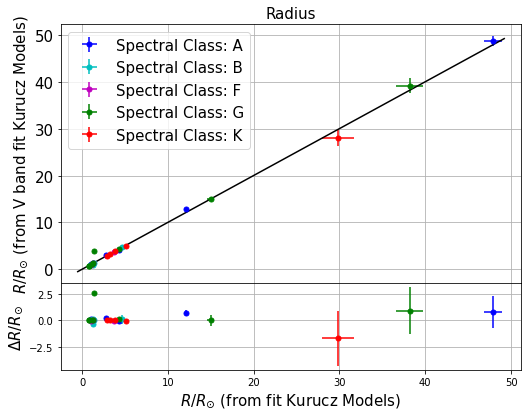

In [26]:
t_f = 15
n_row = 1
n_col = 2
r_data = tgm_data.T[6:8].T
r_data_V = tgm_data_V.T[6:8].T

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
r_data = r_data[np.where(r_data_V.T[0] != np.amax(r_data_V.T[0]))]
r_data_V = r_data_V[np.where(r_data_V.T[0] != np.amax(r_data_V.T[0]))]
p1 = min(min(r_data.T[0])-0.5, min(r_data_V.T[0])-0.50)
point1 = [p1, p1]
p2 = max(max(r_data.T[0])+0.50, max(r_data_V.T[0])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
_class_data = class_data[np.where(r_data_V.T[0] != np.amax(r_data_V.T[0]))]
classes = np.unique(_class_data)
for i in classes:
    idx = np.where(_class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(r_data_V.T[0] == 0))),)
    #idx = (np.delete(idx[0],np.where(idx[0] == np.where(r_data_V.T[0] == np.amax(r_data_V.T[0])))),)
    plt.errorbar(r_data.T[0][idx], r_data_V.T[0][idx], yerr=r_data_V.T[1][idx], xerr=r_data.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$R/R_{\odot}$ (from fit Kurucz Models)",fontsize=t_f)
plt.ylabel(r"$R/R_{\odot}$ (from V band fit Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Radius",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-2,x_values[-1]+2)
frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
for i in classes:
    idx = np.where(_class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(r_data_V.T[0] == 0))),)
    #idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[6] == np.amax(tgm_data_V.T[6])))),)
    plt.errorbar(r_data.T[0][idx], r_data_V.T[0][idx]-r_data.T[0][idx], yerr=np.sqrt(r_data_V.T[1][idx]**2 + r_data.T[1][idx]**2), xerr=r_data.T[1][idx],fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$R/R_{\odot}$ (from fit Kurucz Models)", fontsize = t_f)
plt.ylabel(r"$\Delta R/R_{\odot}$", fontsize = t_f)
plt.grid()
plt.xlim(x_values[0]-2,x_values[-1]+2)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

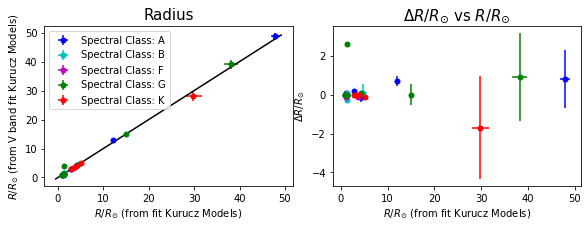

In [123]:
t_f = 15
n_row = 1
n_col = 2
r_data = tgm_data.T[6:8].T
r_data_V = tgm_data_V.T[6:8].T
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
r_data = r_data[np.where(r_data_V.T[0] != np.amax(r_data_V.T[0]))]
r_data_V = r_data_V[np.where(r_data_V.T[0] != np.amax(r_data_V.T[0]))]
p1 = min(min(r_data.T[0])-0.5, min(r_data_V.T[0])-0.50)
point1 = [p1, p1]
p2 = max(max(r_data.T[0])+0.50, max(r_data_V.T[0])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
_class_data = class_data[np.where(r_data_V.T[0] != np.amax(r_data_V.T[0]))]
classes = np.unique(_class_data)
for i in classes:
    idx = np.where(_class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(r_data_V.T[0] == 0))),)
    #idx = (np.delete(idx[0],np.where(idx[0] == np.where(r_data_V.T[0] == np.amax(r_data_V.T[0])))),)
    plt.errorbar(r_data.T[0][idx], r_data_V.T[0][idx], yerr=r_data_V.T[1][idx], xerr=r_data.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$R/R_{\odot}$ (from fit Kurucz Models)")
plt.ylabel(r"$R/R_{\odot}$ (from V band fit Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Radius",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
for i in classes:
    idx = np.where(_class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(r_data_V.T[0] == 0))),)
    #idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[6] == np.amax(tgm_data_V.T[6])))),)
    plt.errorbar(r_data.T[0][idx], r_data_V.T[0][idx]-r_data.T[0][idx], yerr=np.sqrt(r_data_V.T[1][idx]**2 + r_data.T[1][idx]**2), xerr=r_data.T[1][idx],fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$R/R_{\odot}$ (from fit Kurucz Models)", fontsize = 10)
plt.ylabel(r"$\Delta R/R_{\odot}$", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta R/R_{\odot}$ vs $R/R_{\odot}$",fontsize=t_f)
fig.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


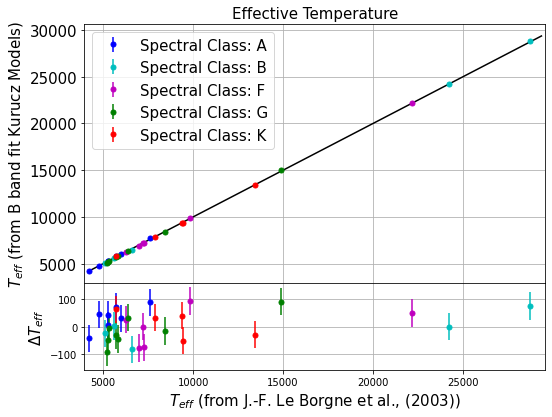

In [62]:
t_f = 15
n_row = 1
n_col = 2

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(tgm_data_B.T[8])-50.0, min(tgm_data_B.T[0])-50.0)
point1 = [p1, p1]
p2 = max(max(tgm_data_B.T[8])+50.0, max(tgm_data_B.T[0])+50.0)
point2 = [p2,p2]
p1,p2 = min(point1[0],point1[1]),max(point2[0],point2[1])
x_values = [p1, p2+500] #gather x-values.
y_values = [p1, p2+500] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    where_no_B = np.where(tgm_data_B.T[0] == 0)
    if(len(where_no_B[0])):
        idx = ([j for j in idx[0] if j != where_no_B],)
    plt.errorbar(tgm_data_B.T[8][idx], tgm_data_B.T[0][idx], yerr=tgm_data_B.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$T_{eff}$ (from J.-F. Le Borgne et al., (2003))",fontsize=t_f)
plt.ylabel(r"$T_{eff}$ (from B band fit Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Effective Temperature",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-200,x_values[-1]+200)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    where_no_B = np.where(tgm_data_B.T[0] == 0)
    if(len(where_no_B[0])):
        idx = ([j for j in idx[0] if j != where_no_B],)
    plt.errorbar(tgm_data_B.T[8][idx], tgm_data_B.T[0][idx]-tgm_data_B.T[8][idx], yerr=tgm_data_B.T[1][idx],fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$T_{eff}$ (from J.-F. Le Borgne et al., (2003))", fontsize = t_f)
plt.ylabel(r"$\Delta T_{eff}$", fontsize = t_f)
plt.grid()
plt.xlim(x_values[0]-200,x_values[-1]+200)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

In [19]:
idx = np.where(class_data == "B")
tgm_data.T[0][idx]

array([28800.,  5600., 24200.,  5100.,  6600.])

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


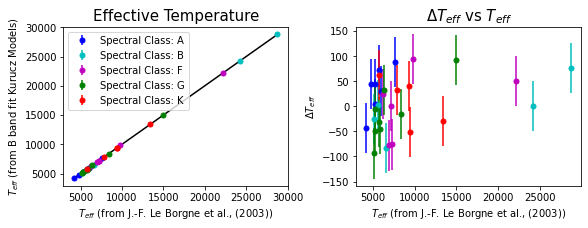

In [124]:
t_f = 15
n_row = 1
n_col = 2

fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(tgm_data_B.T[8])-50.0, min(tgm_data_B.T[0])-50.0)
point1 = [p1, p1]
p2 = max(max(tgm_data_B.T[8])+50.0, max(tgm_data_B.T[0])+50.0)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_B.T[0] == 0))),)
    plt.errorbar(tgm_data_B.T[8][idx], tgm_data_B.T[0][idx], yerr=tgm_data_B.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$T_{eff}$ (from J.-F. Le Borgne et al., (2003))")
plt.ylabel(r"$T_{eff}$ (from B band fit Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Effective Temperature",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_B.T[0] == 0))),)
    plt.errorbar(tgm_data_B.T[8][idx], tgm_data_B.T[0][idx]-tgm_data_B.T[8][idx], yerr=tgm_data_B.T[1][idx],fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$T_{eff}$ (from J.-F. Le Borgne et al., (2003))", fontsize = 10)
plt.ylabel(r"$\Delta T_{eff}$", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta T_{eff}$ vs $T_{eff}$",fontsize=t_f)
fig.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


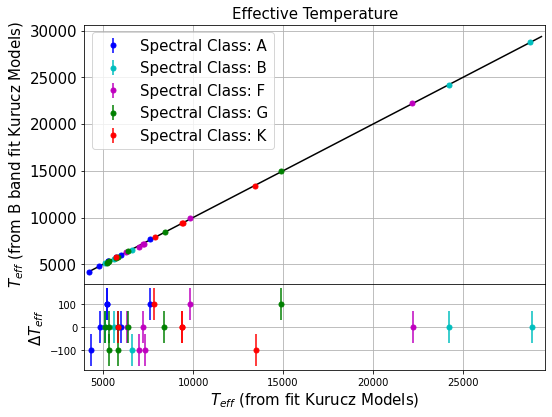

In [63]:
t_f = 15
n_row = 1
n_col = 2

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(tgm_data_B.T[8])-50.0, min(tgm_data_B.T[0])-50.0)
point1 = [p1, p1]
p2 = max(max(tgm_data_B.T[8])+50.0, max(tgm_data_B.T[0])+50.0)
point2 = [p2,p2]
p1,p2 = min(point1[0],point1[1]),max(point2[0],point2[1])
x_values = [p1, p2+500] #gather x-values.
y_values = [p1, p2+500] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    where_no_B = np.where(tgm_data_B.T[0] == 0)
    if(len(where_no_B[0])):
        idx = ([j for j in idx[0] if j != where_no_B],)
    plt.errorbar(tgm_data_B.T[8][idx], tgm_data_B.T[0][idx], yerr=tgm_data_B.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$T_{eff}$ (from J.-F. Le Borgne et al., (2003))",fontsize=t_f)
plt.ylabel(r"$T_{eff}$ (from B band fit Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Effective Temperature",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-200,x_values[-1]+200)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    where_no_B = np.where(tgm_data_B.T[0] == 0)
    if(len(where_no_B[0])):
        idx = ([j for j in idx[0] if j != where_no_B],)
    plt.errorbar(tgm_data.T[0][idx], tgm_data_B.T[0][idx]-tgm_data.T[0][idx], yerr=np.sqrt(tgm_data_B.T[1][idx]**2 + tgm_data.T[1][idx]**2), xerr=tgm_data.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$T_{eff}$ (from fit Kurucz Models)", fontsize = t_f)
plt.ylabel(r"$\Delta T_{eff}$", fontsize = t_f)
plt.grid()
plt.xlim(x_values[0]-200,x_values[-1]+200)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


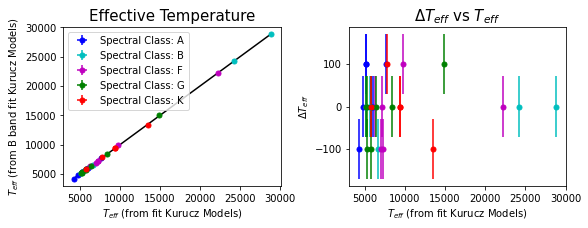

In [126]:
t_f = 15
n_row = 1
n_col = 2

fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(tgm_data_B.T[8])-50.0, min(tgm_data_B.T[0])-50.0)
point1 = [p1, p1]
p2 = max(max(tgm_data_B.T[8])+50.0, max(tgm_data_B.T[0])+50.0)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_B.T[0] == 0))),)
    plt.errorbar(tgm_data.T[0][idx], tgm_data_B.T[0][idx], yerr=tgm_data_B.T[1][idx], xerr=tgm_data.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$T_{eff}$ (from fit Kurucz Models)")
plt.ylabel(r"$T_{eff}$ (from B band fit Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Effective Temperature",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_B.T[0] == 0))),)
    plt.errorbar(tgm_data.T[0][idx], tgm_data_B.T[0][idx]-tgm_data.T[0][idx], yerr=np.sqrt(tgm_data_B.T[1][idx]**2 + tgm_data.T[1][idx]**2), xerr=tgm_data.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$T_{eff}$ (from fit Kurucz Models)", fontsize = 10)
plt.ylabel(r"$\Delta T_{eff}$", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta T_{eff}$ vs $T_{eff}$",fontsize=t_f)
fig.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


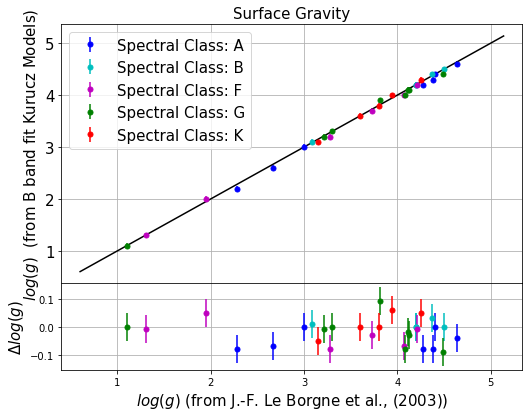

In [64]:
t_f = 15
n_row = 1
n_col = 2

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(tgm_data_B.T[9])-0.5, min(tgm_data_B.T[2])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data_B.T[9])+0.50, max(tgm_data_B.T[2])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    where_no_B = np.where(tgm_data_B.T[0] == 0)
    if(len(where_no_B[0])):
        idx = ([j for j in idx[0] if j != where_no_B],)
    plt.errorbar(tgm_data_B.T[9][idx], tgm_data_B.T[2][idx], yerr=tgm_data_B.T[3][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$log(g)$ (from J.-F. Le Borgne et al., (2003))",fontsize=t_f)
plt.ylabel(r"$log(g)$  (from B band fit Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Surface Gravity",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.2,x_values[-1]+0.2)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    where_no_B = np.where(tgm_data_B.T[0] == 0)
    if(len(where_no_B[0])):
        idx = ([j for j in idx[0] if j != where_no_B],)
    plt.errorbar(tgm_data_B.T[9][idx], tgm_data_B.T[2][idx]-tgm_data_B.T[9][idx], yerr=tgm_data_B.T[3][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$log(g)$ (from J.-F. Le Borgne et al., (2003))", fontsize = t_f)
plt.ylabel(r"$\Delta log(g)$", fontsize = t_f)
plt.grid()
plt.xlim(x_values[0]-0.2,x_values[-1]+0.2)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


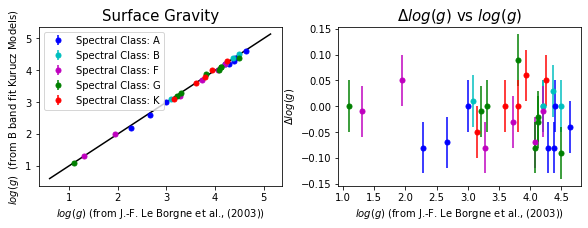

In [127]:
t_f = 15
n_row = 1
n_col = 2

fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(tgm_data_B.T[9])-0.5, min(tgm_data_B.T[2])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data_B.T[9])+0.50, max(tgm_data_B.T[2])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_B.T[0] == 0))),)
    plt.errorbar(tgm_data_B.T[9][idx], tgm_data_B.T[2][idx], yerr=tgm_data_B.T[3][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$log(g)$ (from J.-F. Le Borgne et al., (2003))")
plt.ylabel(r"$log(g)$  (from B band fit Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Surface Gravity",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_B.T[0] == 0))),)
    plt.errorbar(tgm_data_B.T[9][idx], tgm_data_B.T[2][idx]-tgm_data_B.T[9][idx], yerr=tgm_data_B.T[3][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$log(g)$ (from J.-F. Le Borgne et al., (2003))", fontsize = 10)
plt.ylabel(r"$\Delta log(g)$", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta log(g)$ vs $log(g)$",fontsize=t_f)
fig.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


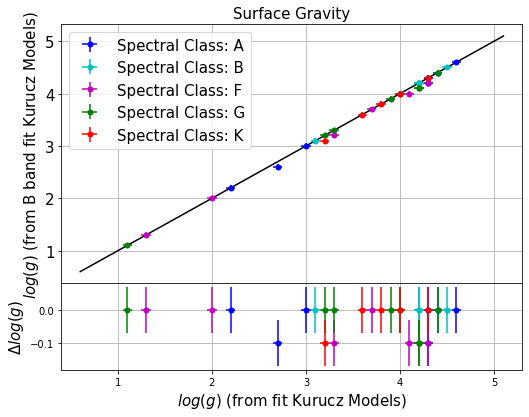

In [65]:
t_f = 15
n_row = 1
n_col = 2

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(tgm_data.T[2])-0.5, min(tgm_data_B.T[2])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data.T[2])+0.50, max(tgm_data_B.T[2])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    where_no_B = np.where(tgm_data_B.T[0] == 0)
    if(len(where_no_B[0])):
        idx = ([j for j in idx[0] if j != where_no_B],)
    plt.errorbar(tgm_data.T[2][idx], tgm_data_B.T[2][idx], yerr=tgm_data_B.T[3][idx], xerr=tgm_data.T[3][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$log(g)$ (from fit Kurucz Models)",fontsize=t_f)
plt.ylabel(r"$log(g)$ (from B band fit Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Surface Gravity",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.2,x_values[-1]+0.2)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    where_no_B = np.where(tgm_data_B.T[0] == 0)
    if(len(where_no_B[0])):
        idx = ([j for j in idx[0] if j != where_no_B],)
    plt.errorbar(tgm_data.T[2][idx], tgm_data_B.T[2][idx]-tgm_data.T[2][idx], yerr=np.sqrt(tgm_data_B.T[3][idx]**2 + tgm_data.T[3][idx]**2), xerr=tgm_data.T[3][idx],fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$log(g)$ (from fit Kurucz Models)", fontsize = t_f)
plt.ylabel(r"$\Delta log(g)$", fontsize = t_f)
plt.grid()
plt.xlim(x_values[0]-0.2,x_values[-1]+0.2)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


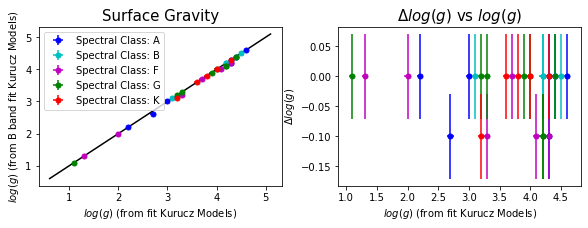

In [128]:
t_f = 15
n_row = 1
n_col = 2

fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(tgm_data.T[2])-0.5, min(tgm_data_B.T[2])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data.T[2])+0.50, max(tgm_data_B.T[2])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_B.T[0] == 0))),)
    plt.errorbar(tgm_data.T[2][idx], tgm_data_B.T[2][idx], yerr=tgm_data_B.T[3][idx], xerr=tgm_data.T[3][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$log(g)$ (from fit Kurucz Models)")
plt.ylabel(r"$log(g)$ (from B band fit Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Surface Gravity",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_B.T[0] == 0))),)
    plt.errorbar(tgm_data.T[2][idx], tgm_data_B.T[2][idx]-tgm_data.T[2][idx], yerr=np.sqrt(tgm_data_B.T[3][idx]**2 + tgm_data.T[3][idx]**2), xerr=tgm_data.T[3][idx],fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$log(g)$ (from fit Kurucz Models)", fontsize = 10)
plt.ylabel(r"$\Delta log(g)$", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta log(g)$ vs $log(g)$",fontsize=t_f)
fig.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


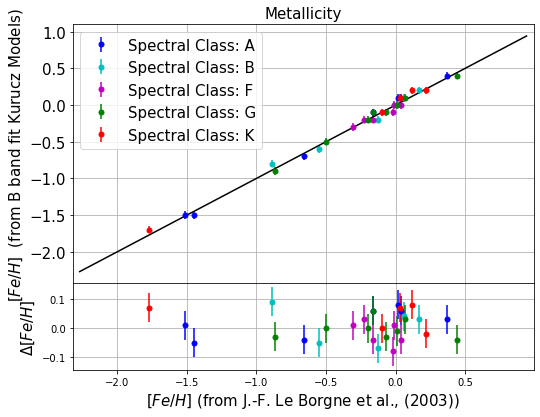

In [34]:
t_f = 15
n_row = 1
n_col = 2

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(tgm_data_B.T[10])-0.5, min(tgm_data_B.T[4])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data_B.T[10])+0.50, max(tgm_data_B.T[4])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_B.T[0] == 0))),)
    plt.errorbar(tgm_data_B.T[10][idx], tgm_data_B.T[4][idx], yerr=tgm_data_B.T[5][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$[Fe/H]$ (from J.-F. Le Borgne et al., (2003))",fontsize=t_f)
plt.ylabel(r"$[Fe/H]$  (from B band fit Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Metallicity",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.05,x_values[-1]+0.05)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_B.T[0] == 0))),)
    plt.errorbar(tgm_data_B.T[10][idx], tgm_data_B.T[4][idx]-tgm_data_B.T[10][idx], yerr=tgm_data_B.T[5][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$[Fe/H]$ (from J.-F. Le Borgne et al., (2003))", fontsize = t_f)
plt.ylabel(r"$\Delta [Fe/H]$", fontsize = t_f)
plt.grid()
plt.xlim(x_values[0]-0.05,x_values[-1]+0.05)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


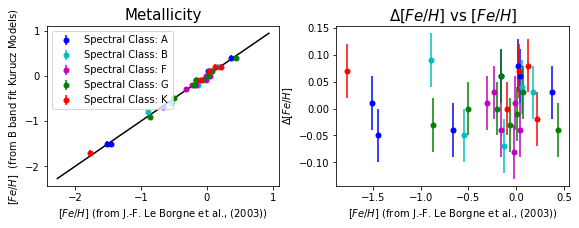

In [129]:
t_f = 15
n_row = 1
n_col = 2

fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(tgm_data_B.T[10])-0.5, min(tgm_data_B.T[4])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data_B.T[10])+0.50, max(tgm_data_B.T[4])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_B.T[0] == 0))),)
    plt.errorbar(tgm_data_B.T[10][idx], tgm_data_B.T[4][idx], yerr=tgm_data_B.T[5][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$[Fe/H]$ (from J.-F. Le Borgne et al., (2003))")
plt.ylabel(r"$[Fe/H]$  (from B band fit Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Metallicity",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_B.T[0] == 0))),)
    plt.errorbar(tgm_data_B.T[10][idx], tgm_data_B.T[4][idx]-tgm_data_B.T[10][idx], yerr=tgm_data_B.T[5][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$[Fe/H]$ (from J.-F. Le Borgne et al., (2003))", fontsize = 10)
plt.ylabel(r"$\Delta [Fe/H]$", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta [Fe/H]$ vs $[Fe/H]$",fontsize=t_f)
fig.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


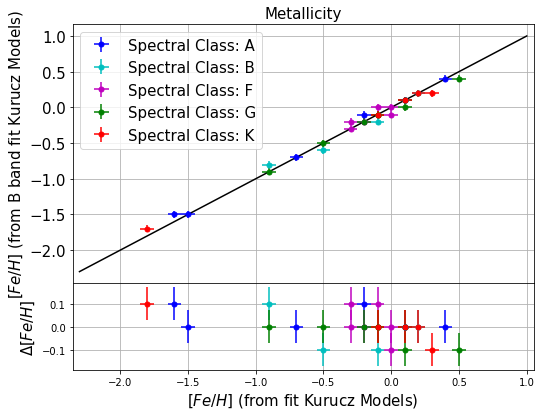

In [35]:
t_f = 15
n_row = 1
n_col = 2

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(tgm_data.T[4])-0.5, min(tgm_data_B.T[4])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data.T[4])+0.50, max(tgm_data_B.T[4])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_B.T[0] == 0))),)
    plt.errorbar(tgm_data.T[4][idx], tgm_data_B.T[4][idx], yerr=tgm_data_B.T[5][idx], xerr=tgm_data.T[5][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$[Fe/H]$ (from fit Kurucz Models)",fontsize=t_f)
plt.ylabel(r"$[Fe/H]$ (from B band fit Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Metallicity",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.05,x_values[-1]+0.05)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_B.T[0] == 0))),)
    plt.errorbar(tgm_data.T[4][idx], tgm_data_B.T[4][idx]-tgm_data.T[4][idx], yerr=np.sqrt(tgm_data_B.T[5][idx]**2 + tgm_data.T[5][idx]**2), xerr=tgm_data.T[5][idx],fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$[Fe/H]$ (from fit Kurucz Models)", fontsize = t_f)
plt.ylabel(r"$\Delta [Fe/H]$", fontsize = t_f)
plt.grid()
plt.xlim(x_values[0]-0.05,x_values[-1]+0.05)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


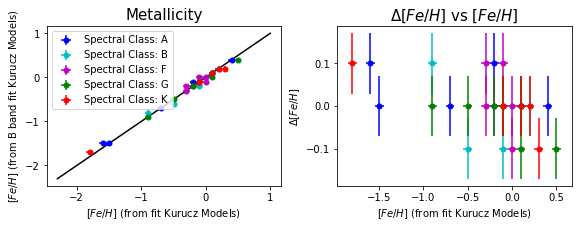

In [130]:
t_f = 15
n_row = 1
n_col = 2

fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(tgm_data.T[4])-0.5, min(tgm_data_B.T[4])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data.T[4])+0.50, max(tgm_data_B.T[4])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_B.T[0] == 0))),)
    plt.errorbar(tgm_data.T[4][idx], tgm_data_B.T[4][idx], yerr=tgm_data_B.T[5][idx], xerr=tgm_data.T[5][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$[Fe/H]$ (from fit Kurucz Models)")
plt.ylabel(r"$[Fe/H]$ (from B band fit Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Metallicity",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_B.T[0] == 0))),)
    plt.errorbar(tgm_data.T[4][idx], tgm_data_B.T[4][idx]-tgm_data.T[4][idx], yerr=np.sqrt(tgm_data_B.T[5][idx]**2 + tgm_data.T[5][idx]**2), xerr=tgm_data.T[5][idx],fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$[Fe/H]$ (from fit Kurucz Models)", fontsize = 10)
plt.ylabel(r"$\Delta [Fe/H]$", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta [Fe/H]$ vs $[Fe/H]$",fontsize=t_f)
fig.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


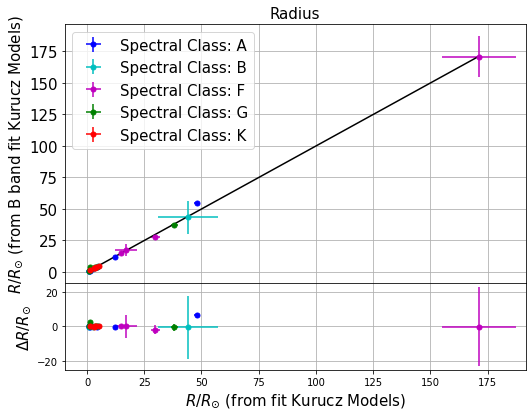

In [38]:
t_f = 15
n_row = 1
n_col = 2

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(tgm_data.T[6])-0.5, min(tgm_data_B.T[6])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data.T[6])+0.50, max(tgm_data_B.T[6])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_B.T[0] == 0))),)
    plt.errorbar(tgm_data.T[6][idx], tgm_data_B.T[6][idx], yerr=tgm_data_B.T[7][idx], xerr=tgm_data.T[7][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$R/R_{\odot}$ (from fit Kurucz Models)",fontsize=t_f)
plt.ylabel(r"$R/R_{\odot}$ (from B band fit Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Radius",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-10,x_values[-1]+20)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_B.T[0] == 0))),)
    plt.errorbar(tgm_data.T[6][idx], tgm_data_B.T[6][idx]-tgm_data.T[6][idx], yerr=np.sqrt(tgm_data_B.T[7][idx]**2 + tgm_data.T[7][idx]**2), xerr=tgm_data.T[7][idx],fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$R/R_{\odot}$ (from fit Kurucz Models)", fontsize = t_f)
plt.ylabel(r"$\Delta R/R_{\odot}$", fontsize = t_f)
plt.grid()
plt.xlim(x_values[0]-10,x_values[-1]+20)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


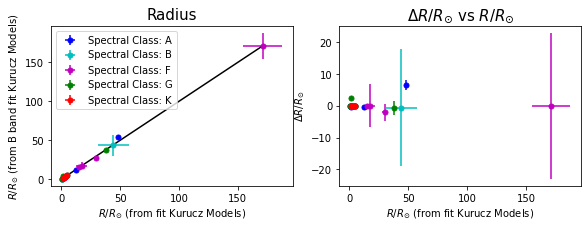

In [132]:
t_f = 15
n_row = 1
n_col = 2

fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(tgm_data.T[6])-0.5, min(tgm_data_B.T[6])-0.50)
point1 = [p1, p1]
p2 = max(max(tgm_data.T[6])+0.50, max(tgm_data_B.T[6])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_B.T[0] == 0))),)
    plt.errorbar(tgm_data.T[6][idx], tgm_data_B.T[6][idx], yerr=tgm_data_B.T[7][idx], xerr=tgm_data.T[7][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$R/R_{\odot}$ (from fit Kurucz Models)")
plt.ylabel(r"$R/R_{\odot}$ (from B band fit Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Radius",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_B.T[0] == 0))),)
    plt.errorbar(tgm_data.T[6][idx], tgm_data_B.T[6][idx]-tgm_data.T[6][idx], yerr=np.sqrt(tgm_data_B.T[7][idx]**2 + tgm_data.T[7][idx]**2), xerr=tgm_data.T[7][idx],fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$R/R_{\odot}$ (from fit Kurucz Models)", fontsize = 10)
plt.ylabel(r"$\Delta R/R_{\odot}$", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta R/R_{\odot}$ vs $R/R_{\odot}$",fontsize=t_f)
fig.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


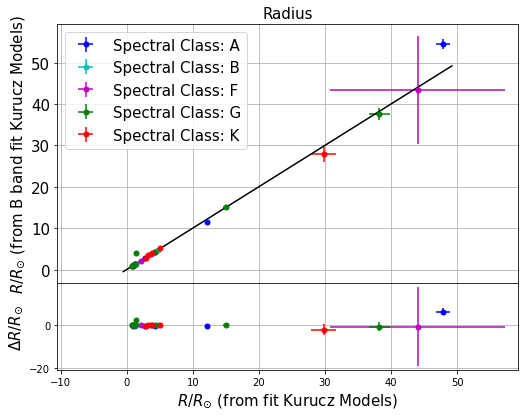

In [41]:
t_f = 15
n_row = 1
n_col = 2
r_data = tgm_data.T[6:8].T
r_data_B = tgm_data_B.T[6:8].T

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
r_data = r_data[np.where(r_data_B.T[0] != np.amax(r_data_B.T[0]))]
r_data_B = r_data_B[np.where(r_data_B.T[0] != np.amax(r_data_B.T[0]))]
p1 = min(min(r_data.T[0])-0.5, min(r_data_V.T[0])-0.50)
point1 = [p1, p1]
p2 = max(max(r_data.T[0])+0.50, max(r_data_V.T[0])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
_class_data = class_data[np.where(r_data_B.T[0] != np.amax(r_data_B.T[0]))]
classes = np.unique(_class_data)
for i in classes:
    idx = np.where(_class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(r_data_B.T[0] == 0))),)
    #idx = (np.delete(idx[0],np.where(idx[0] == np.where(r_data_V.T[0] == np.amax(r_data_V.T[0])))),)
    plt.errorbar(r_data.T[0][idx], r_data_B.T[0][idx], yerr=r_data_B.T[1][idx], xerr=r_data.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$R/R_{\odot}$ (from fit Kurucz Models)",fontsize=t_f)
plt.ylabel(r"$R/R_{\odot}$ (from B band fit Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Radius",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-10,x_values[-1]+10)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
for i in classes:
    idx = np.where(_class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(r_data_B.T[0] == 0))),)
    #idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[6] == np.amax(tgm_data_V.T[6])))),)
    plt.errorbar(r_data.T[0][idx], r_data_B.T[0][idx]-r_data.T[0][idx], yerr=np.sqrt(r_data_B.T[1][idx]**2 + r_data.T[1][idx]**2), xerr=r_data.T[1][idx],fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$R/R_{\odot}$ (from fit Kurucz Models)", fontsize = t_f)
plt.ylabel(r"$\Delta R/R_{\odot}$", fontsize = t_f)
plt.grid()
plt.xlim(x_values[0]-10,x_values[-1]+10)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


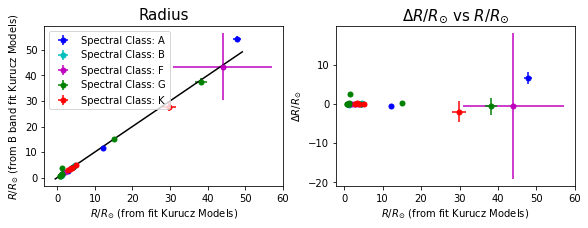

In [135]:
t_f = 15
n_row = 1
n_col = 2
r_data = tgm_data.T[6:8].T
r_data_B = tgm_data_B.T[6:8].T
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
r_data = r_data[np.where(r_data_B.T[0] != np.amax(r_data_B.T[0]))]
r_data_B = r_data_B[np.where(r_data_B.T[0] != np.amax(r_data_B.T[0]))]
p1 = min(min(r_data.T[0])-0.5, min(r_data_V.T[0])-0.50)
point1 = [p1, p1]
p2 = max(max(r_data.T[0])+0.50, max(r_data_V.T[0])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
_class_data = class_data[np.where(r_data_B.T[0] != np.amax(r_data_B.T[0]))]
classes = np.unique(_class_data)
for i in classes:
    idx = np.where(_class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(r_data_B.T[0] == 0))),)
    #idx = (np.delete(idx[0],np.where(idx[0] == np.where(r_data_V.T[0] == np.amax(r_data_V.T[0])))),)
    plt.errorbar(r_data.T[0][idx], r_data_B.T[0][idx], yerr=r_data_B.T[1][idx], xerr=r_data.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$R/R_{\odot}$ (from fit Kurucz Models)")
plt.ylabel(r"$R/R_{\odot}$ (from B band fit Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Radius",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
for i in classes:
    idx = np.where(_class_data == i)
    idx = (np.delete(idx[0],np.where(idx[0] == np.where(r_data_B.T[0] == 0))),)
    #idx = (np.delete(idx[0],np.where(idx[0] == np.where(tgm_data_V.T[6] == np.amax(tgm_data_V.T[6])))),)
    plt.errorbar(r_data.T[0][idx], r_data_B.T[0][idx]-r_data.T[0][idx], yerr=np.sqrt(r_data_B.T[1][idx]**2 + r_data.T[1][idx]**2), xerr=r_data.T[1][idx],fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$R/R_{\odot}$ (from fit Kurucz Models)", fontsize = 10)
plt.ylabel(r"$\Delta R/R_{\odot}$", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta R/R_{\odot}$ vs $R/R_{\odot}$",fontsize=t_f)
fig.tight_layout(pad=0.1)

In [6]:
ubvri_data = np.zeros((class_data.size,np.arange(3,25,2).size))
ctr = 0
with open(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/ubvri_data.txt") as f:
    for line in f:
        temp = line.split()
        if(len(temp) > 1):
            for i in np.arange(3,25,2):
                if(i != 13):
                    try:
                        ubvri_data[ctr][(i//2) -1] = float(temp[i]) 
                    except:
                        ubvri_data[ctr][(i//2) -1] = 0
                else:
                    continue
        else:
            continue
        ctr += 1
ubvri_data = np.delete(ubvri_data,5,1)

In [7]:
bv_data = np.zeros((class_data.size,np.arange(3,13,2).size))
ctr = 0
with open(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/bv_data.txt") as f:
    for line in f:
        temp = line.split()
        if(len(temp) > 1):
            for i in np.arange(3,13,2):
                if(i != 7):
                    try:
                        bv_data[ctr][(i//2) -1] = float(temp[i]) 
                    except:
                        bv_data[ctr][(i//2) -1] = 0
                else:
                    continue
        else:
            continue
        ctr += 1
bv_data = np.delete(bv_data,2,1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


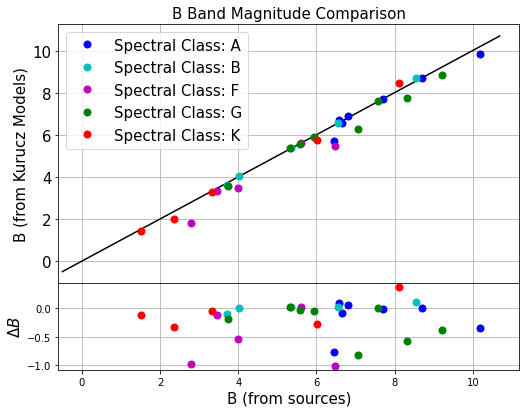

In [11]:
t_f = 15
n_row = 1
n_col = 2
r_data = tgm_data.T[6:8].T
r_data_B = tgm_data_B.T[6:8].T

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(bv_data.T[2])-0.5, min(bv_data.T[0])-0.50)
point1 = [p1, p1]
p2 = max(max(bv_data.T[2])+0.50, max(bv_data.T[0])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = bv_data.T[2][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from sources)",fontsize=t_f)
plt.ylabel("B (from Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("B Band Magnitude Comparison",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.5)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
for i in classes:
    idx = np.where(class_data == i)
    x = bv_data.T[2][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from sources)",fontsize=t_f)
plt.ylabel(r"$\Delta B$",fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.5)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

Text(0.5, 1.0, '$\\Delta B$ vs B Band Magnitude Comparison')

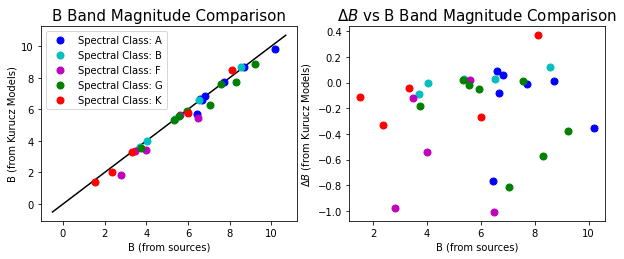

In [8]:
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(bv_data.T[2])-0.5, min(bv_data.T[0])-0.50)
point1 = [p1, p1]
p2 = max(max(bv_data.T[2])+0.50, max(bv_data.T[0])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = bv_data.T[2][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from sources)")
plt.ylabel("B (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("B Band Magnitude Comparison",fontsize=t_f)
#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = bv_data.T[2][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from sources)")
plt.ylabel(r"$\Delta B$ (from Kurucz Models)")
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta B$ vs B Band Magnitude Comparison",fontsize=t_f)
#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")


/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


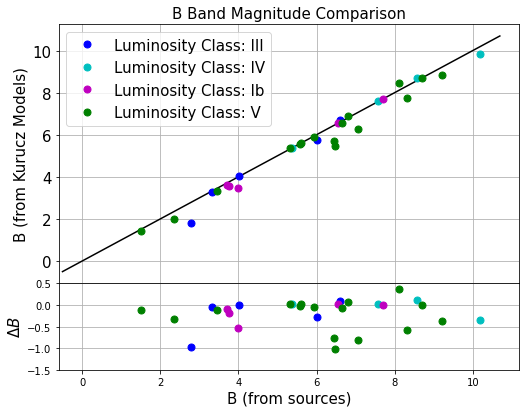

In [65]:
t_f = 15
n_row = 1
n_col = 2
r_data = tgm_data.T[6:8].T
r_data_B = tgm_data_B.T[6:8].T

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(bv_data.T[2])-0.5, min(bv_data.T[0])-0.50)
point1 = [p1, p1]
p2 = max(max(bv_data.T[2])+0.50, max(bv_data.T[0])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0

for i in types:
    idx = np.where(type_data == i)
    x = bv_data.T[2][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from sources)",fontsize=t_f)
plt.ylabel("B (from Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("B Band Magnitude Comparison",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.5)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
for i in types:
    idx = np.where(type_data == i)
    x = bv_data.T[2][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from sources)",fontsize=t_f)
plt.ylabel(r"$\Delta B$",fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.5)
plt.ylim(-1.5,0.5)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

Text(0.5, 1.0, '$\\Delta B$ vs B Band Magnitude Comparison')

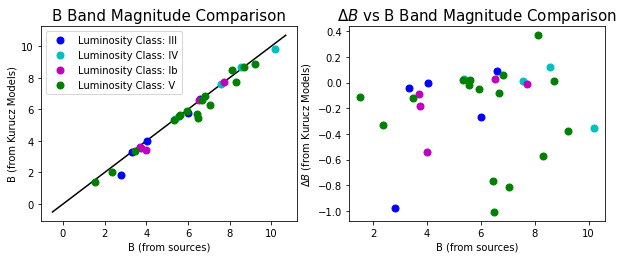

In [13]:
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(bv_data.T[2])-0.5, min(bv_data.T[0])-0.50)
point1 = [p1, p1]
p2 = max(max(bv_data.T[2])+0.50, max(bv_data.T[0])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0

for i in types:
    idx = np.where(type_data == i)
    x = bv_data.T[2][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from sources)")
plt.ylabel("B (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("B Band Magnitude Comparison",fontsize=t_f)
#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0

for i in types:
    idx = np.where(type_data == i)
    x = bv_data.T[2][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from sources)")
plt.ylabel(r"$\Delta B$ (from Kurucz Models)")
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta B$ vs B Band Magnitude Comparison",fontsize=t_f)
#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")


/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


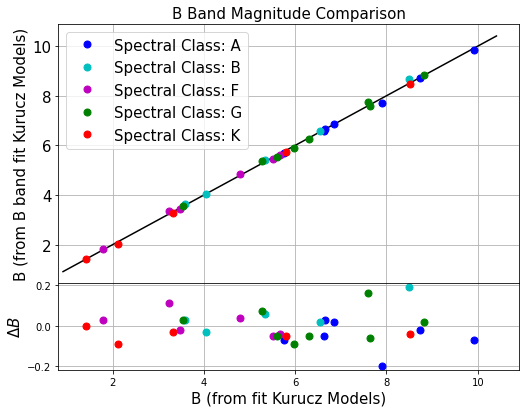

In [14]:
t_f = 15
n_row = 1
n_col = 2
r_data = tgm_data.T[6:8].T
r_data_B = tgm_data_B.T[6:8].T

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(ubvri_data.T[1])-0.5, min(bv_data.T[0])-0.50)
point1 = [p1, p1]
p2 = max(max(ubvri_data.T[1])+0.50, max(bv_data.T[0])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[1][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from fit Kurucz Models)",fontsize=t_f)
plt.ylabel("B (from B band fit Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("B Band Magnitude Comparison",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.5)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[1][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from fit Kurucz Models)",fontsize=t_f)
plt.ylabel(r"$\Delta B$",fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.5)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

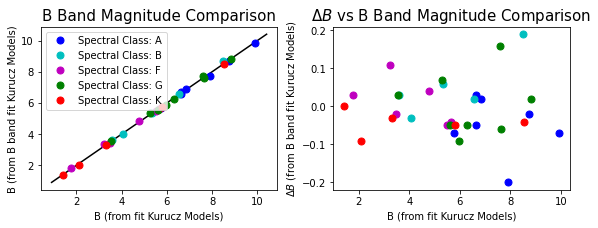

In [251]:
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(ubvri_data.T[1])-0.5, min(bv_data.T[0])-0.50)
point1 = [p1, p1]
p2 = max(max(ubvri_data.T[1])+0.50, max(bv_data.T[0])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[1][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from fit Kurucz Models)")
plt.ylabel("B (from B band fit Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("B Band Magnitude Comparison",fontsize=t_f)
#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[1][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from fit Kurucz Models)")
plt.ylabel(r"$\Delta B$ (from B band fit Kurucz Models)")
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta B$ vs B Band Magnitude Comparison",fontsize=t_f)
#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")
plt.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


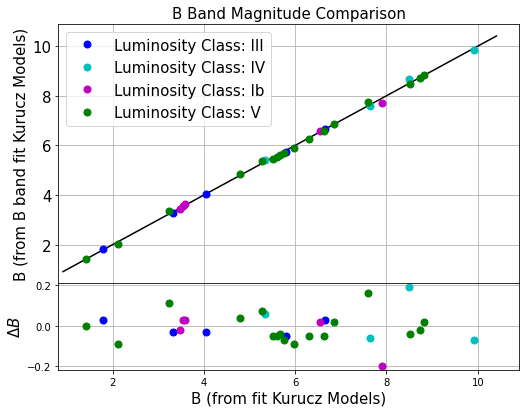

In [15]:
t_f = 15
n_row = 1
n_col = 2
r_data = tgm_data.T[6:8].T
r_data_B = tgm_data_B.T[6:8].T

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(ubvri_data.T[1])-0.5, min(bv_data.T[0])-0.50)
point1 = [p1, p1]
p2 = max(max(ubvri_data.T[1])+0.50, max(bv_data.T[0])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0

for i in types:
    idx = np.where(type_data == i)
    x = ubvri_data.T[1][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from fit Kurucz Models)",fontsize=t_f)
plt.ylabel("B (from B band fit Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("B Band Magnitude Comparison",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.5)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
for i in types:
    idx = np.where(type_data == i)
    x = ubvri_data.T[1][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from fit Kurucz Models)",fontsize=t_f)
plt.ylabel(r"$\Delta B$",fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.5)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

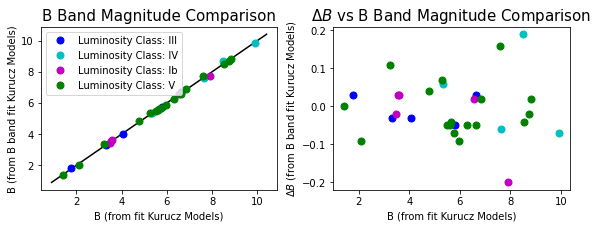

In [14]:
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(ubvri_data.T[1])-0.5, min(bv_data.T[0])-0.50)
point1 = [p1, p1]
p2 = max(max(ubvri_data.T[1])+0.50, max(bv_data.T[0])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0

for i in types:
    idx = np.where(type_data == i)
    x = ubvri_data.T[1][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from fit Kurucz Models)")
plt.ylabel("B (from B band fit Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("B Band Magnitude Comparison",fontsize=t_f)
#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
for i in types:
    idx = np.where(type_data == i)
    x = ubvri_data.T[1][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from fit Kurucz Models)")
plt.ylabel(r"$\Delta B$ (from B band fit Kurucz Models)")
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta B$ vs B Band Magnitude Comparison",fontsize=t_f)
#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")
plt.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


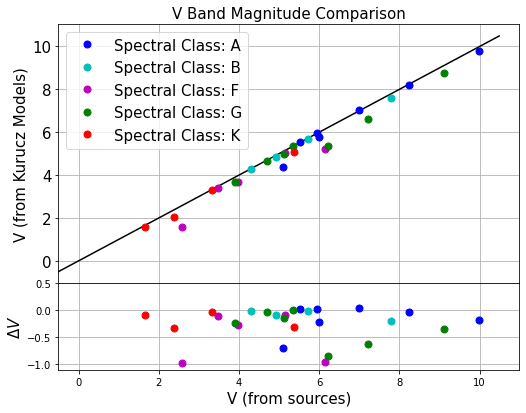

In [20]:
t_f = 15
n_row = 1
n_col = 2
r_data = tgm_data.T[6:8].T
r_data_B = tgm_data_B.T[6:8].T

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(bv_data.T[3])-0.5, min(bv_data.T[1])-0.50)
point1 = [p1, p1]
p2 = max(max(bv_data.T[3])+0.50, max(bv_data.T[1])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    _x = idx[0]
    _y = np.intersect1d(idx[0],np.where(np.logical_or(bv_data.T[1] == 0, bv_data.T[3] == 0))[0])
    idx = (np.setxor1d(_x, _y),) 
    x = bv_data.T[3][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[1][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("V (from sources)",fontsize=t_f)
plt.ylabel("V (from Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("V Band Magnitude Comparison",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0],x_values[-1]+0.5)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    _x = idx[0]
    _y = np.intersect1d(idx[0],np.where(np.logical_or(bv_data.T[1] == 0, bv_data.T[3] == 0))[0])
    idx = (np.setxor1d(_x, _y),)
    x = bv_data.T[3][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[1][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("V (from sources)",fontsize=t_f)
plt.ylabel(r"$\Delta V$",fontsize=t_f)
plt.grid()
plt.xlim(x_values[0],x_values[-1]+0.5)
plt.ylim(-1.1,0.5)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

Text(0.5, 1.0, '$\\Delta V$ vs V Band Magnitude Comparison')

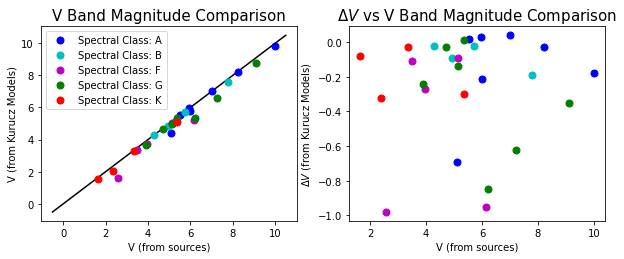

In [258]:
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(bv_data.T[3])-0.5, min(bv_data.T[1])-0.50)
point1 = [p1, p1]
p2 = max(max(bv_data.T[3])+0.50, max(bv_data.T[1])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    _x = idx[0]
    _y = np.intersect1d(idx[0],np.where(np.logical_or(bv_data.T[1] == 0, bv_data.T[3] == 0))[0])
    idx = (np.setxor1d(_x, _y),) 
    x = bv_data.T[3][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[1][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("V (from sources)")
plt.ylabel("V (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("V Band Magnitude Comparison",fontsize=t_f)
#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    _x = idx[0]
    _y = np.intersect1d(idx[0],np.where(np.logical_or(bv_data.T[1] == 0, bv_data.T[3] == 0))[0])
    idx = (np.setxor1d(_x, _y),)
    x = bv_data.T[3][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[1][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("V (from sources)")
plt.ylabel(r"$\Delta V$ (from Kurucz Models)")
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta V$ vs V Band Magnitude Comparison",fontsize=t_f)
#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")


/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


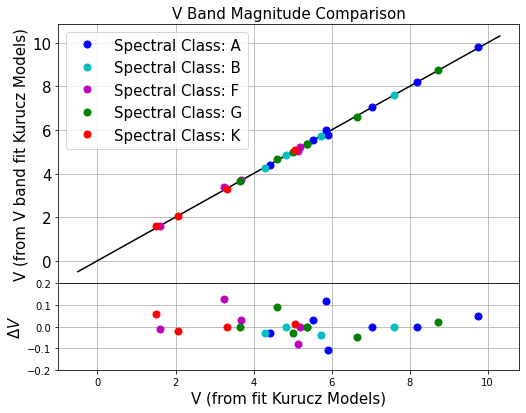

In [26]:
t_f = 15
n_row = 1
n_col = 2
r_data = tgm_data.T[6:8].T
r_data_B = tgm_data_B.T[6:8].T

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(ubvri_data.T[2])-0.5, min(bv_data.T[1])-0.50)
point1 = [p1, p1]
p2 = max(max(ubvri_data.T[2])+0.50, max(bv_data.T[1])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    _x = idx[0]
    _y = np.intersect1d(idx[0],np.where(np.logical_or(bv_data.T[1] == 0, bv_data.T[3] == 0))[0])
    idx = (np.setxor1d(_x, _y),)
    x = ubvri_data.T[2][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[1][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("V (from fit Kurucz Models)",fontsize=t_f)
plt.ylabel("V (from V band fit Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("V Band Magnitude Comparison",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.5,x_values[-1]+0.5)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    _x = idx[0]
    _y = np.intersect1d(idx[0],np.where(np.logical_or(bv_data.T[1] == 0, bv_data.T[3] == 0))[0])
    idx = (np.setxor1d(_x, _y),)
    x = ubvri_data.T[2][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[1][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("V (from fit Kurucz Models)",fontsize=t_f)
plt.ylabel(r"$\Delta V$",fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.5,x_values[-1]+0.5)
plt.ylim(-0.2,0.2)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

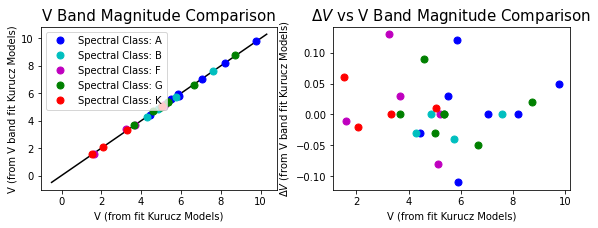

In [262]:
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(ubvri_data.T[2])-0.5, min(bv_data.T[1])-0.50)
point1 = [p1, p1]
p2 = max(max(ubvri_data.T[2])+0.50, max(bv_data.T[1])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    _x = idx[0]
    _y = np.intersect1d(idx[0],np.where(np.logical_or(bv_data.T[1] == 0, bv_data.T[3] == 0))[0])
    idx = (np.setxor1d(_x, _y),)
    x = ubvri_data.T[2][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[1][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("V (from fit Kurucz Models)")
plt.ylabel("V (from V band fit Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("V Band Magnitude Comparison",fontsize=t_f)
#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    _x = idx[0]
    _y = np.intersect1d(idx[0],np.where(np.logical_or(bv_data.T[1] == 0, bv_data.T[3] == 0))[0])
    idx = (np.setxor1d(_x, _y),)
    x = ubvri_data.T[2][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[1][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("V (from fit Kurucz Models)")
plt.ylabel(r"$\Delta V$ (from V band fit Kurucz Models)")
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta V$ vs V Band Magnitude Comparison",fontsize=t_f)
#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")
plt.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


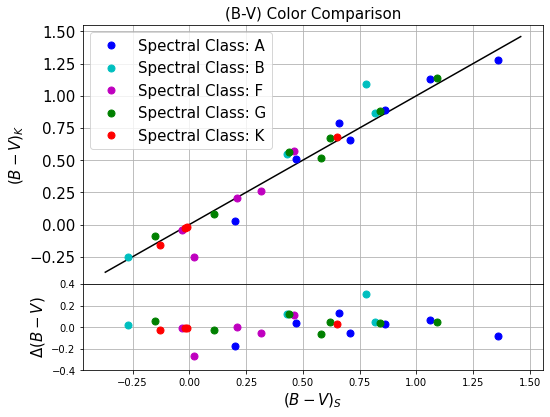

In [35]:
t_f = 15
n_row = 1
n_col = 2

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
ctr = 0
idx = np.where(np.logical_and(np.logical_and(np.logical_and(bv_data.T[ctr]!=0,bv_data.T[ctr+1]!=0),bv_data.T[ctr+2]!=0),bv_data.T[ctr+3]!=0))
x = bv_data.T[ctr+2][idx]-bv_data.T[ctr+3][idx]
y = bv_data.T[ctr][idx]-bv_data.T[ctr+1][idx]

frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(min(_x),min(_y))
    if(max(max(_x),max(_y)) > p2):
        p2 = max(max(_x),max(_y))
    plt.errorbar(_x,_y,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1

point1 = [p1,p1]
point2 = [p2,p2]
x_values = [point1[0]-0.1, point2[0]+0.1] #gather x-values.
y_values = [point1[1]-0.1, point2[1]+0.1] #gather y-values.
plt.plot(x_values, y_values,color='k')

plt.xlabel(r"$(B-V)_S$",fontsize=t_f)
plt.ylabel(r"$(B-V)_K$",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("(B-V) Color Comparison",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)

frame2=fig1.add_axes((.1,.1,.8,.2))        
frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(_y-_x)
    if(min(max(_x),max(_y)) > p2):
        p2 = max(_y-_x)
    plt.errorbar(_x,_y-_x,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1
plt.xlabel(r"$(B-V)_S$",fontsize=t_f)
plt.ylabel(r"$\Delta (B-V)$",fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)
plt.ylim(-0.4,0.4)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

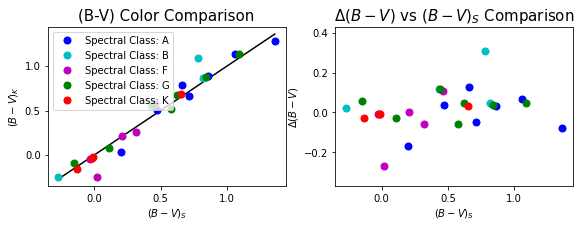

In [31]:
p1 = np.inf
p2 = -np.inf
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
ctr = 0
ax = fig.add_subplot(n_row,n_col,1)
idx = np.where(np.logical_and(np.logical_and(np.logical_and(bv_data.T[ctr]!=0,bv_data.T[ctr+1]!=0),bv_data.T[ctr+2]!=0),bv_data.T[ctr+3]!=0))
x = bv_data.T[ctr+2][idx]-bv_data.T[ctr+3][idx]
y = bv_data.T[ctr][idx]-bv_data.T[ctr+1][idx]

frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(min(_x),min(_y))
    if(max(max(_x),max(_y)) > p2):
        p2 = max(max(_x),max(_y))
    plt.errorbar(_x,_y,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1

point1 = [p1,p1]
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')

plt.xlabel(r"$(B-V)_S$")
plt.ylabel(r"$(B-V)_K$")
plt.legend(loc ='upper left')   
plt.title("(B-V) Color Comparison",fontsize=t_f)

p1 = np.inf
p2 = -np.inf
ctr = 1
ax = fig.add_subplot(n_row,n_col,2)
frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(_y-_x)
    if(min(max(_x),max(_y)) > p2):
        p2 = max(_y-_x)
    plt.errorbar(_x,_y-_x,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1
plt.xlabel(r"$(B-V)_S$")
plt.ylabel(r"$\Delta (B-V)$")
plt.ylim([p1-0.1,p2+0.4])
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta(B-V)$ vs $(B-V)_S$ Comparison",fontsize=t_f)
fig.tight_layout(pad=0.1)


/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


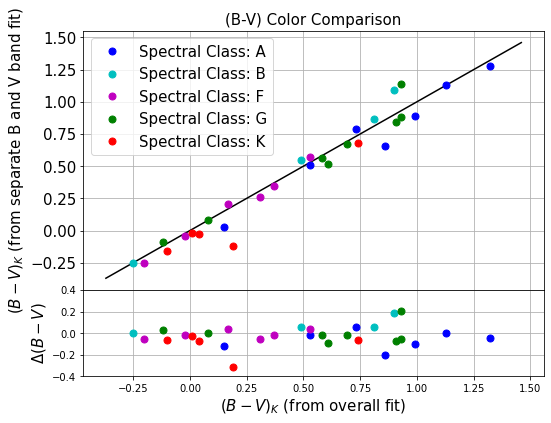

In [39]:
t_f = 15
n_row = 1
n_col = 2

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
ctr = 0
idx = np.where((np.logical_and(bv_data.T[ctr]!=0,bv_data.T[ctr+1]!=0)))
x = ubvri_data.T[ctr+1][idx]-ubvri_data.T[ctr+2][idx]
y = bv_data.T[ctr][idx]-bv_data.T[ctr+1][idx]

frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(min(_x),min(_y))
    if(max(max(_x),max(_y)) > p2):
        p2 = max(max(_x),max(_y))
    plt.errorbar(_x,_y,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1

point1 = [p1-0.1,p1-0.1]
point2 = [p2+0.1,p2+0.1]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')

plt.xlabel(r"$(B-V)_K$ (from overall fit)",fontsize=t_f)
plt.ylabel(r"$(B-V)_K$ (from separate B and V band fit)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("(B-V) Color Comparison",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)

frame2=fig1.add_axes((.1,.1,.8,.2))        
frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(_y-_x)
    if(min(max(_x),max(_y)) > p2):
        p2 = max(_y-_x)
    plt.errorbar(_x,_y-_x,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1
plt.xlabel(r"$(B-V)_K$ (from overall fit)",fontsize=t_f)
plt.ylabel(r"$\Delta (B-V)$",fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)
plt.ylim(-0.4,0.4)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

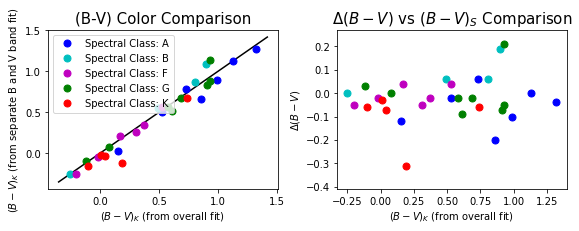

In [22]:
p1 = np.inf
p2 = -np.inf
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
ctr = 0
ax = fig.add_subplot(n_row,n_col,1)
idx = np.where((np.logical_and(bv_data.T[ctr]!=0,bv_data.T[ctr+1]!=0)))
x = ubvri_data.T[ctr+1][idx]-ubvri_data.T[ctr+2][idx]
y = bv_data.T[ctr][idx]-bv_data.T[ctr+1][idx]

frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(min(_x),min(_y))
    if(max(max(_x),max(_y)) > p2):
        p2 = max(max(_x),max(_y))
    plt.errorbar(_x,_y,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1

point1 = [p1-0.1,p1-0.1]
point2 = [p2+0.1,p2+0.1]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')

plt.xlabel(r"$(B-V)_K$ (from overall fit)")
plt.ylabel(r"$(B-V)_K$ (from separate B and V band fit)")
plt.legend(loc ='upper left')   
plt.title("(B-V) Color Comparison",fontsize=t_f)

p1 = np.inf
p2 = -np.inf
ctr = 1
ax = fig.add_subplot(n_row,n_col,2)
frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(_y-_x)
    if(min(max(_x),max(_y)) > p2):
        p2 = max(_y-_x)
    plt.errorbar(_x,_y-_x,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1
plt.xlabel(r"$(B-V)_K$ (from overall fit)")
plt.ylabel(r"$\Delta (B-V)$")
plt.ylim([p1-0.1,p2+0.3])
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta(B-V)$ vs $(B-V)_S$ Comparison",fontsize=t_f)
fig.tight_layout(pad=0.1)


/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


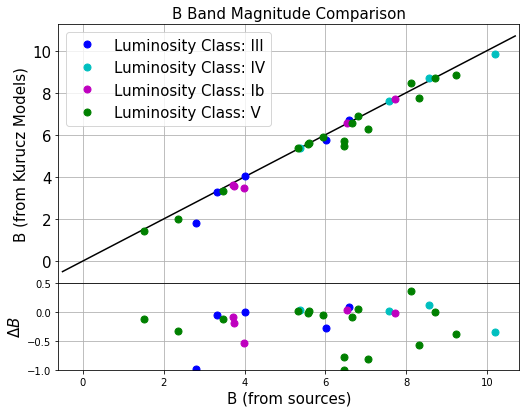

In [43]:
t_f = 15
n_row = 1
n_col = 2

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(bv_data.T[2])-0.5, min(bv_data.T[0])-0.50)
point1 = [p1, p1]
p2 = max(max(bv_data.T[2])+0.50, max(bv_data.T[0])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
for i in types:
    idx = np.where(type_data == i)
    x = bv_data.T[2][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from sources)",fontsize=t_f)
plt.ylabel("B (from Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("B Band Magnitude Comparison",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
for i in types:
    idx = np.where(type_data == i)
    x = bv_data.T[2][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from sources)",fontsize=t_f)
plt.ylabel(r"$\Delta B$",fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)
plt.ylim(-1.0,0.5)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

Text(0.5, 1.0, '$\\Delta B$ vs B Band Magnitude Comparison')

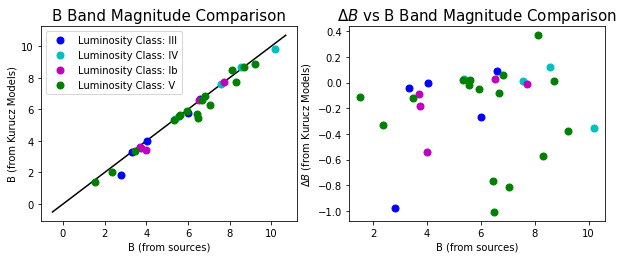

In [24]:
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(bv_data.T[2])-0.5, min(bv_data.T[0])-0.50)
point1 = [p1, p1]
p2 = max(max(bv_data.T[2])+0.50, max(bv_data.T[0])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
for i in types:
    idx = np.where(type_data == i)
    x = bv_data.T[2][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from sources)")
plt.ylabel("B (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("B Band Magnitude Comparison",fontsize=t_f)
#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
for i in types:
    idx = np.where(type_data == i)
    x = bv_data.T[2][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from sources)")
plt.ylabel(r"$\Delta B$ (from Kurucz Models)")
#plt.legend(loc ='lower right')   
plt.title(r"$\Delta B$ vs B Band Magnitude Comparison",fontsize=t_f)
#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")


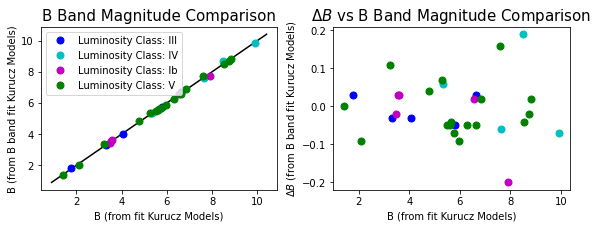

In [254]:
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(ubvri_data.T[1])-0.5, min(bv_data.T[0])-0.50)
point1 = [p1, p1]
p2 = max(max(ubvri_data.T[1])+0.50, max(bv_data.T[0])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
for i in types:
    idx = np.where(type_data == i)
    x = ubvri_data.T[1][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from fit Kurucz Models)")
plt.ylabel("B (from B band fit Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("B Band Magnitude Comparison",fontsize=t_f)
#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0

for i in types:
    idx = np.where(type_data == i)
    x = ubvri_data.T[1][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from fit Kurucz Models)")
plt.ylabel(r"$\Delta B$ (from B band fit Kurucz Models)")
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta B$ vs B Band Magnitude Comparison",fontsize=t_f)
#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")
plt.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


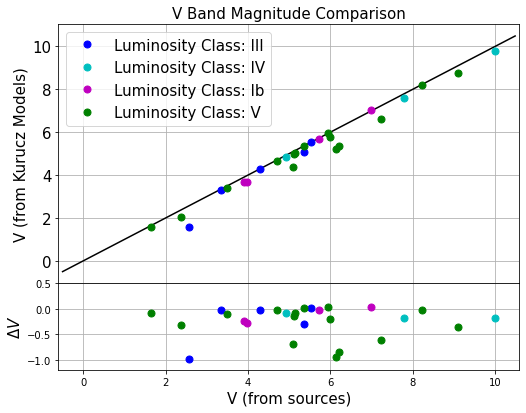

In [48]:
t_f = 15
n_row = 1
n_col = 2

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(bv_data.T[3])-0.5, min(bv_data.T[1])-0.50)
point1 = [p1, p1]
p2 = max(max(bv_data.T[3])+0.50, max(bv_data.T[1])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0

for i in types:
    idx = np.where(type_data == i)
    _x = idx[0]
    _y = np.intersect1d(idx[0],np.where(np.logical_or(bv_data.T[1] == 0, bv_data.T[3] == 0))[0])
    idx = (np.setxor1d(_x, _y),) 
    x = bv_data.T[3][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[1][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel("V (from sources)",fontsize=t_f)
plt.ylabel("V (from Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("V Band Magnitude Comparison",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
for i in types:
    idx = np.where(type_data == i)
    _x = idx[0]
    _y = np.intersect1d(idx[0],np.where(np.logical_or(bv_data.T[1] == 0, bv_data.T[3] == 0))[0])
    idx = (np.setxor1d(_x, _y),)
    x = bv_data.T[3][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[1][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel("V (from sources)",fontsize=t_f)
plt.ylabel(r"$\Delta V$",fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)
plt.ylim(-1.2,0.5)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

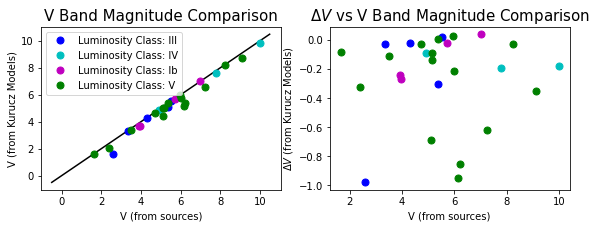

In [257]:
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

    ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(bv_data.T[3])-0.5, min(bv_data.T[1])-0.50)
point1 = [p1, p1]
p2 = max(max(bv_data.T[3])+0.50, max(bv_data.T[1])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0

for i in types:
    idx = np.where(type_data == i)
    _x = idx[0]
    _y = np.intersect1d(idx[0],np.where(np.logical_or(bv_data.T[1] == 0, bv_data.T[3] == 0))[0])
    idx = (np.setxor1d(_x, _y),) 
    x = bv_data.T[3][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[1][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel("V (from sources)")
plt.ylabel("V (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("V Band Magnitude Comparison",fontsize=t_f)
#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
for i in types:
    idx = np.where(type_data == i)
    _x = idx[0]
    _y = np.intersect1d(idx[0],np.where(np.logical_or(bv_data.T[1] == 0, bv_data.T[3] == 0))[0])
    idx = (np.setxor1d(_x, _y),)
    x = bv_data.T[3][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[1][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel("V (from sources)")
plt.ylabel(r"$\Delta V$ (from Kurucz Models)")
#plt.legend(loc ='upper left') 
plt.title(r"$\Delta V$ vs V Band Magnitude Comparison",fontsize=t_f)
#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")
plt.tight_layout(pad=0.1)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


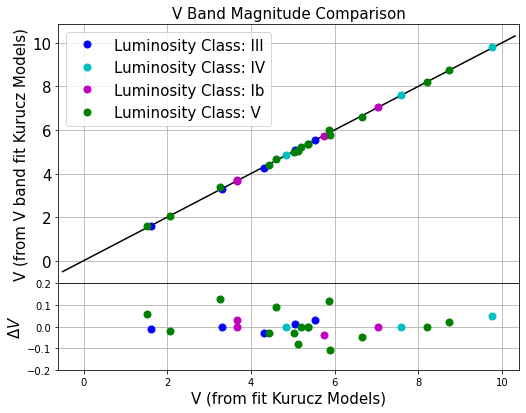

In [52]:
t_f = 15
n_row = 1
n_col = 2

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(ubvri_data.T[2])-0.5, min(bv_data.T[1])-0.50)
point1 = [p1, p1]
p2 = max(max(ubvri_data.T[2])+0.50, max(bv_data.T[1])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0

for i in types:
    idx = np.where(type_data == i)
    _x = idx[0]
    _y = np.intersect1d(idx[0],np.where(np.logical_or(bv_data.T[1] == 0, bv_data.T[3] == 0))[0])
    idx = (np.setxor1d(_x, _y),)
    x = ubvri_data.T[2][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[1][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel("V (from fit Kurucz Models)",fontsize=t_f)
plt.ylabel("V (from V band fit Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("V Band Magnitude Comparison",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
for i in types:
    idx = np.where(type_data == i)
    _x = idx[0]
    _y = np.intersect1d(idx[0],np.where(np.logical_or(bv_data.T[1] == 0, bv_data.T[3] == 0))[0])
    idx = (np.setxor1d(_x, _y),)
    x = ubvri_data.T[2][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[1][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel("V (from fit Kurucz Models)",fontsize=t_f)
plt.ylabel(r"$\Delta V$",fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)
plt.ylim(-0.2,0.2)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

Text(0.5, 1.0, '$\\Delta V$ vs V Band Magnitude Comparison')

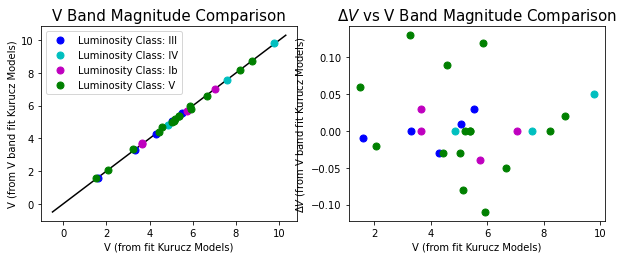

In [261]:
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(ubvri_data.T[2])-0.5, min(bv_data.T[1])-0.50)
point1 = [p1, p1]
p2 = max(max(ubvri_data.T[2])+0.50, max(bv_data.T[1])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0

for i in types:
    idx = np.where(type_data == i)
    _x = idx[0]
    _y = np.intersect1d(idx[0],np.where(np.logical_or(bv_data.T[1] == 0, bv_data.T[3] == 0))[0])
    idx = (np.setxor1d(_x, _y),)
    x = ubvri_data.T[2][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[1][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel("V (from fit Kurucz Models)")
plt.ylabel("V (from V band fit Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("V Band Magnitude Comparison",fontsize=t_f)
#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0

for i in types:
    idx = np.where(type_data == i)
    _x = idx[0]
    _y = np.intersect1d(idx[0],np.where(np.logical_or(bv_data.T[1] == 0, bv_data.T[3] == 0))[0])
    idx = (np.setxor1d(_x, _y),)
    x = ubvri_data.T[2][idx]
    xidx = np.where(x != 0)
    y = bv_data.T[1][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    ctr += 1
plt.xlabel("V (from fit Kurucz Models)")
plt.ylabel(r"$\Delta V$ (from V band fit Kurucz Models)")
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta V$ vs V Band Magnitude Comparison",fontsize=t_f)
#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")


/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


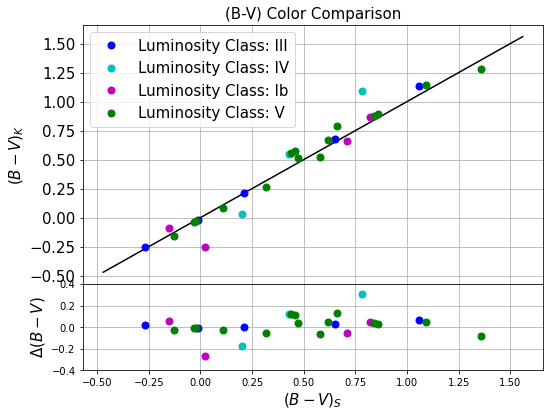

In [57]:
t_f = 15
n_row = 1
n_col = 2

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
ctr = 0
idx = np.where(np.logical_and(np.logical_and(np.logical_and(bv_data.T[ctr]!=0,bv_data.T[ctr+1]!=0),bv_data.T[ctr+2]!=0),bv_data.T[ctr+3]!=0))
x = bv_data.T[ctr+2][idx]-bv_data.T[ctr+3][idx]
y = bv_data.T[ctr][idx]-bv_data.T[ctr+1][idx]

frmt = ['ob','oc','om','og','or']
class_ctr = 0

for i in types:
    _idx = np.where(type_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(min(_x),min(_y))
    if(max(max(_x),max(_y)) > p2):
        p2 = max(max(_x),max(_y))
    plt.errorbar(_x,_y,fmt=frmt[class_ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    class_ctr += 1

point1 = [p1,p1]
point2 = [p2,p2]
x_values = [point1[0]-0.2, point2[0]+0.2] #gather x-values.
y_values = [point1[1]-0.2, point2[1]+0.2] #gather y-values.
plt. plot(x_values, y_values,color='k')

plt.xlabel(r"$(B-V)_S$",fontsize=t_f)
plt.ylabel(r"$(B-V)_K$",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("(B-V) Color Comparison",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)

frame2=fig1.add_axes((.1,.1,.8,.2))        
p1 = np.inf
p2 = -np.inf
ctr = 1
frmt = ['ob','oc','om','og','or']
class_ctr = 0

for i in types:
    _idx = np.where(type_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(_y-_x)
    if(min(max(_x),max(_y)) > p2):
        p2 = max(_y-_x)
    plt.errorbar(_x,_y-_x,fmt=frmt[class_ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    class_ctr += 1
plt.xlabel(r"$(B-V)_S$",fontsize=t_f)
plt.ylabel(r"$\Delta (B-V)$",fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)
plt.ylim(-0.4,0.4)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

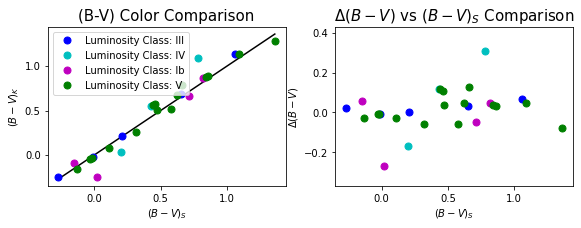

In [26]:
p1 = np.inf
p2 = -np.inf
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
ctr = 0
ax = fig.add_subplot(n_row,n_col,1)
idx = np.where(np.logical_and(np.logical_and(np.logical_and(bv_data.T[ctr]!=0,bv_data.T[ctr+1]!=0),bv_data.T[ctr+2]!=0),bv_data.T[ctr+3]!=0))
x = bv_data.T[ctr+2][idx]-bv_data.T[ctr+3][idx]
y = bv_data.T[ctr][idx]-bv_data.T[ctr+1][idx]

frmt = ['ob','oc','om','og','or']
class_ctr = 0

for i in types:
    _idx = np.where(type_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(min(_x),min(_y))
    if(max(max(_x),max(_y)) > p2):
        p2 = max(max(_x),max(_y))
    plt.errorbar(_x,_y,fmt=frmt[class_ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    class_ctr += 1

point1 = [p1,p1]
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')

plt.xlabel(r"$(B-V)_S$")
plt.ylabel(r"$(B-V)_K$")
plt.legend(loc ='upper left')   
plt.title("(B-V) Color Comparison",fontsize=t_f)

p1 = np.inf
p2 = -np.inf
ctr = 1
ax = fig.add_subplot(n_row,n_col,2)
frmt = ['ob','oc','om','og','or']
class_ctr = 0

for i in types:
    _idx = np.where(type_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(_y-_x)
    if(min(max(_x),max(_y)) > p2):
        p2 = max(_y-_x)
    plt.errorbar(_x,_y-_x,fmt=frmt[class_ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    class_ctr += 1
plt.xlabel(r"$(B-V)_S$")
plt.ylabel(r"$\Delta (B-V)$")
plt.ylim([p1-0.1,p2+0.3])
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta(B-V)$ vs $(B-V)_S$ Comparison",fontsize=t_f)
fig.tight_layout(pad=0.1)


/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


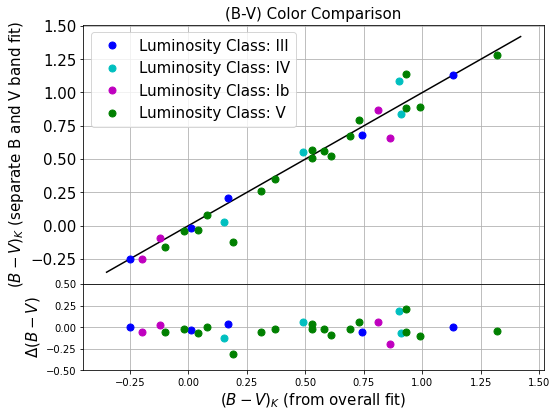

In [61]:
t_f = 15
n_row = 1
n_col = 2

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
ctr = 0
idx = np.where((np.logical_and(bv_data.T[ctr]!=0,bv_data.T[ctr+1]!=0)))
x = ubvri_data.T[ctr+1][idx]-ubvri_data.T[ctr+2][idx]
y = bv_data.T[ctr][idx]-bv_data.T[ctr+1][idx]

frmt = ['ob','oc','om','og','or']
class_ctr = 0
#classes = np.unique(class_data)
for i in types:
    _idx = np.where(type_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(min(_x),min(_y))
    if(max(max(_x),max(_y)) > p2):
        p2 = max(max(_x),max(_y))
    plt.errorbar(_x,_y,fmt=frmt[class_ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    class_ctr += 1

point1 = [p1-0.1,p1-0.1]
point2 = [p2+0.1,p2+0.1]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')

plt.xlabel(r"$(B-V)_K$ (from overall fit)",fontsize=t_f)
plt.ylabel(r"$(B-V)_K$ (separate B and V band fit)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("(B-V) Color Comparison",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)

frame2=fig1.add_axes((.1,.1,.8,.2))        
p1 = np.inf
p2 = -np.inf
ctr = 1
frmt = ['ob','oc','om','og','or']
class_ctr = 0

for i in types:
    _idx = np.where(type_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(_y-_x)
    if(min(max(_x),max(_y)) > p2):
        p2 = max(_y-_x)
    plt.errorbar(_x,_y-_x,fmt=frmt[class_ctr], markersize = '7', label='  the same in a  Class: {}'.format(i))
    class_ctr += 1
plt.xlabel(r"$(B-V)_K$ (from overall fit)",fontsize=t_f)
plt.ylabel(r"$\Delta (B-V)$",fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)
plt.ylim(-0.5,0.5)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

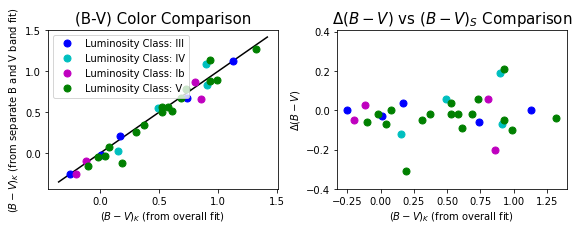

In [28]:
p1 = np.inf
p2 = -np.inf
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
ctr = 0
ax = fig.add_subplot(n_row,n_col,1)
idx = np.where((np.logical_and(bv_data.T[ctr]!=0,bv_data.T[ctr+1]!=0)))
x = ubvri_data.T[ctr+1][idx]-ubvri_data.T[ctr+2][idx]
y = bv_data.T[ctr][idx]-bv_data.T[ctr+1][idx]

frmt = ['ob','oc','om','og','or']
class_ctr = 0
#classes = np.unique(class_data)
for i in types:
    _idx = np.where(type_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(min(_x),min(_y))
    if(max(max(_x),max(_y)) > p2):
        p2 = max(max(_x),max(_y))
    plt.errorbar(_x,_y,fmt=frmt[class_ctr], markersize = '7', label='Luminosity Class: {}'.format(i))
    class_ctr += 1

point1 = [p1-0.1,p1-0.1]
point2 = [p2+0.1,p2+0.1]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')

plt.xlabel(r"$(B-V)_K$ (from overall fit)")
plt.ylabel(r"$(B-V)_K$ (from separate B and V band fit)")
plt.legend(loc ='upper left')   
plt.title("(B-V) Color Comparison",fontsize=t_f)

p1 = np.inf
p2 = -np.inf
ctr = 1
ax = fig.add_subplot(n_row,n_col,2)
frmt = ['ob','oc','om','og','or']
class_ctr = 0

for i in types:
    _idx = np.where(type_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(_y-_x)
    if(min(max(_x),max(_y)) > p2):
        p2 = max(_y-_x)
    plt.errorbar(_x,_y-_x,fmt=frmt[class_ctr], markersize = '7', label='  the same in a  Class: {}'.format(i))
    class_ctr += 1
plt.xlabel(r"$(B-V)_K$ (from overall fit)")
plt.ylabel(r"$\Delta (B-V)$")
plt.ylim([p1-0.2,p2+0.2])
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta(B-V)$ vs $(B-V)_S$ Comparison",fontsize=t_f)
fig.tight_layout(pad=0.1)
